In [3]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string
import sys

# Oregon

## VEST Documentation

Election results from the Oregon Secretary of State's office via OpenElections (https://github.com/openelections/openelections-data-or/). Results from Polk, Tillamook, Wallowa, and Wasco counties were corrected with the respective county reports.

Precinct shapefiles for the 2016 election were obtained from the following counties: Benton, Columbia, Coos, Crook, Curry, Deschutes, Douglas, Harney, Jackson, Josephine, Klamath, Lane, Linn, Malheur, Morrow, Multnomah, Polk, Sherman, Tillamook, Umatilla, Union, Wallowa, Wasco, Washington, Yamhill.

Precinct shapefiles for the 2016 election were provided by the Oregon Secretary of State's office for the following counties: Clatsop, Hood River, Jefferson, Marion. The Marion County shapefile included numerous gaps that were assigned based on the Precinct Split Summary report from the county clerk's office. Precincts along the Salem/Kaiser border were revised with the corrected municipal boundaries from the Marion County 2019 precinct shapefile.

The 2016 precinct shapefile for Clackamas County was provided by the Metro Regional Government Data Resource Center.

Precinct boundaries for Grant County and Wheeler County are defined by school district boundaries. Precinct shapefiles were produced to match PDF maps provided by the respective counties using the 2016 Oregon Education Boundaries shapefile obtained from the Oregon Spatial Data Library.

Precinct shapefiles for the following counties were produced based on PDF maps provided by the respective counties: Baker, Gilliam, Lake, Lincoln. Boundaries defined by the PLSS grid were produced with the Oregon Public Land Survey Quarter-Quarter Reference Grid shapefile obtained from the Oregon spatial Data Library. Municipal boundaries were produced from the Oregon Department of Transportion 2016 City Limits shapefile obtained from the Oregon Spatial Data Library. Street boundaries are produced from the U.S. Census Bureau's census block shapefiles.

PDF maps obtained from Lake County are approximate precinct boundaries drawn on the PLSS grid for county precincts and on the street map for Lakeview city precincts. These boundaries were adjusted to match address range assignments in the Lake County Address Library Report which serves as the legal definition of the precincts according to the Lake County Clerk. Precinct divisions for roads that cross multiple rural precincts are generally defined by zip codes. Address ranges were further identified based on the Lake County tax lot parcel viewer.

Rural precinct boundaries in the shapefiles provided by Coos County and Union County were revised to match the updated PLSS cadastral grid in the Oregon GIS Framework obtained from the Oregon Spatial Data Library. 

Municipal precinct boundaries in the shapefiles provided by Tillamook County and Umatilla County were revised to reverse annexations that were not yet in effect for the November 2016 general election. 

The boundaries of precincts 14, 37, 45, 49 in the Deschutes County shapefile were revised to match legislative district assignments.

Precinct numbers in the Columbia County, Josephine County, and Wallowa County shapefiles were corrected to match the Oregon Secretary of State voter file.

G16PREDCLI - Hillary Clinton (Democratic Party)  
G16PRERTRU - Donald Trump (Republican Party)  
G16PRELJOH - Gary Johnson (Libertarian Party)  
G16PREGSTE - Jill Stein (Green Party)  
G16PREOWRI - Write-in Votes  

G16USSDWYD - Ron Wyden (Democratic Party)  
G16USSRCAL - Mark Callahan (Republican Party)  
G16USSLLIN - Jim Lindsay (Libertarian Party)  
G16USSGNAV - Eric Navickas (Pacfic Green Party)  
G16USSWLEW - Shanti Lewallen (Working Families Party)  
G16USSIREY - Steven Cody Reynolds (Independent Party)  
G16USSOWRI - Write-in Votes  

G16GOVDBRO - Kate Brown (Democratic Party and Working Families Party (fusion candidate))  
G16GOVRPIE - Bud Pierce (Republican Party)  
G16GOVLFOS - James Foster (Libertarian Party)  
G16GOVCAUE - Aaron Donald Auer (Constitution Party)  
G16GOVITHO - Cliff Thomason (Independent Party)  
G16GOVOWRI - Write-in Votes  

G16ATGDROS - Ellen Rosenblum (Democratic Party and Working Families Party (fusion candidate))  
G16ATGRCRO - Daniel Zene Crowe (Republican Party)  
G16ATGLHED - Lars D. H. Hedbor (Libertarian Party)  
G16ATGOWRI - Write-in Votes  

G16SOSDAVA - Brad Avakian (Democratic Party, Working Families, and Progressive Party (fusion candidate))  
G16SOSRRIC - Dennis Richardson (Republican Party)  
G16SOSLDUR - Sharon L. Durbin (Libertarian Party)  
G16SOSGZUN - Alan Zundel (Pacific Green Party)  
G16SOSCMAR - Michael Marsh (Constitution Party)  
G16SOSIWEL - Paul Damian Wells (Independent Party)  
G16SOSOWRI - Write-in Votes  

G16TREDREA - Tobias Read (Democratic Party)  
G16TRERGUD - Jeff Gudman (Republican Party)  
G16TREPHEN - Chris Henry (Progressive Party and Pacific Green Party (fusion candidate))  
G16TREITEL - Chris Telfer (Independent Party)  
G16TREOWRI - Write-in Votes  

## Load VEST File

In [4]:
vest_or_16 = gp.read_file("./raw-from-source/VEST/or_2016/or_2016.shp")

In [5]:
data_columns = ['G16ATGDROS', 'G16ATGLHED', 'G16ATGOWRI', 'G16ATGRCRO', 'G16GOVCAUE',
       'G16GOVDBRO', 'G16GOVITHO', 'G16GOVLFOS', 'G16GOVOWRI', 'G16GOVRPIE',
       'G16PREDCLI', 'G16PREGSTE', 'G16PRELJOH', 'G16PREOWRI', 'G16PRERTRU',
       'G16SOSCMAR', 'G16SOSDAVA', 'G16SOSGZUN', 'G16SOSIWEL', 'G16SOSLDUR',
       'G16SOSOWRI', 'G16SOSRRIC', 'G16TREDREA', 'G16TREITEL', 'G16TREOWRI',
       'G16TREPHEN', 'G16TRERGUD', 'G16USSDWYD', 'G16USSGNAV', 'G16USSIREY',
       'G16USSLLIN', 'G16USSOWRI', 'G16USSRCAL', 'G16USSWLEW']

## Load OR Votes

In [6]:
file_list = os.listdir("./raw-from-source/Open_Elections/2016/counties")
li = []
for file in file_list:
    #print(file)
    if "general" in file:
        #print(file)
        file_ref = "./raw-from-source/Open_Elections/2016/counties/"+file
        file_prev = pd.read_csv(file_ref)
        if 'precincts' in file_prev.columns:
            file_prev['precinct'] = file_prev['precincts']
     
        file_prev = file_prev[['county', 'precinct', 'office', 'district', 'party', 'candidate','votes']]
        li.append(file_prev)
election_results = pd.concat(li, axis=0, ignore_index=True)
display(election_results)

county precinct       office  district party  \
0        Crook        1  U.S. Senate       NaN   IND   
1        Crook        1    President       NaN   REP   
2        Crook        1   U.S. House       2.0   REP   
3        Crook        1    President       NaN   DEM   
4        Crook        1   U.S. House       2.0   DEM   
...        ...      ...          ...       ...   ...   
72422  Sherman        3  State House      57.0   NaN   
72423  Sherman        4  State House      57.0   NaN   
72424  Sherman        4  State House      57.0   NaN   
72425  Sherman        5  State House      57.0   NaN   
72426  Sherman        5  State House      57.0   NaN   

                         candidate  votes  
0                Steven C Reynolds     22  
1      Donald J Trump / Mike Pence    309  
2                      Greg Walden    354  
3      Hillary Clinton / Tim Kaine    122  
4                James (Jim) Crary    104  
...                            ...    ...  
72422                  Under Votes     55  
72423                   Over Votes      0  
72424                  Under Votes     31  
72425                   Over Votes      0  
72426                  Under Votes      4  

[72427 rows x 7 columns]

In [7]:
#Take a look
display(election_results)

county precinct       office  district party  \
0        Crook        1  U.S. Senate       NaN   IND   
1        Crook        1    President       NaN   REP   
2        Crook        1   U.S. House       2.0   REP   
3        Crook        1    President       NaN   DEM   
4        Crook        1   U.S. House       2.0   DEM   
...        ...      ...          ...       ...   ...   
72422  Sherman        3  State House      57.0   NaN   
72423  Sherman        4  State House      57.0   NaN   
72424  Sherman        4  State House      57.0   NaN   
72425  Sherman        5  State House      57.0   NaN   
72426  Sherman        5  State House      57.0   NaN   

                         candidate  votes  
0                Steven C Reynolds     22  
1      Donald J Trump / Mike Pence    309  
2                      Greg Walden    354  
3      Hillary Clinton / Tim Kaine    122  
4                James (Jim) Crary    104  
...                            ...    ...  
72422                  Under Votes     55  
72423                   Over Votes      0  
72424                  Under Votes     31  
72425                   Over Votes      0  
72426                  Under Votes      4  

[72427 rows x 7 columns]

In [8]:
#Filter down to relevant offices
election_results = election_results[election_results["office"].isin(['U.S. Senate', 'President', 'Governor',
       'Attorney General', 'Secretary of State', 'State Treasurer'])]

#Create a pivot column
election_results["pivot_id"] = election_results["county"].astype(str) +"-"+ election_results["precinct"].astype(str)

#Filter out vote columns we don't need
election_results = election_results[~election_results["candidate"].isin(['Over Votes','Under Votes','Total'])]

#Create a column with both the candidate and the race
election_results["cand-race"] = election_results["office"].astype(str) +"-"+ election_results["candidate"].astype(str)

In [9]:
#Define a name change dictionary
cand_name_changes_dict = {'Attorney General-Daniel Crowe':"G16ATGRCRO", 
'Attorney General-Daniel Zene Crowe':"G16ATGRCRO",
'Attorney General-Ellen Rosenblum':"G16ATGDROS", 
'Attorney General-Lars D H Hedbor':"G16ATGLHED",
'Attorney General-Lars Hedbor':"G16ATGLHED",
'Attorney General-Write-ins':"G16ATGOWRI",

'Governor-Aaron Auer':"G16GOVCAUE",
'Governor-Aaron Donald Auer':"G16GOVCAUE",
'Governor-Bud Pierce':"G16GOVRPIE",
'Governor-Cliff Thomason':"G16GOVITHO",
'Governor-James Foster':"G16GOVLFOS",
'Governor-Kate Brown':"G16GOVDBRO",
'Governor-Write-ins':"G16GOVOWRI",

'President-Donald J Trump':"G16PRERTRU", 
'President-Donald J Trump / Mike Pence':"G16PRERTRU",
'President-Donald Trump':"G16PRERTRU", 
'President-Donald Trump/Mike Pence':"G16PRERTRU",
'President-Gary Johnson':"G16PRELJOH", 
'President-Gary Johnson / Bill Weld':"G16PRELJOH",
'President-Gary Johnson/Bill Weld':"G16PRELJOH",
'President-Hillary Clinton':"G16PREDCLI",
'President-Hillary Clinton / Tim Kaine':"G16PREDCLI",
'President-Hillary Clinton/Tim Kaine':"G16PREDCLI", 
'President-Jill Stein':"G16PREGSTE",
'President-Jill Stein / Ajamu Baraka':"G16PREGSTE",
'President-Jill Stein/Ajamu Baraka':"G16PREGSTE", 
'President-Write-ins':"G16PREOWRI",

'Secretary of State-Alan Zundel':"G16SOSGZUN", 
'Secretary of State-Brad Avakian':"G16SOSDAVA",
'Secretary of State-Dennis Richardson':"G16SOSRRIC",
'Secretary of State-Michael Marsh':"G16SOSCMAR", 
'Secretary of State-Paul Damian Wells':"G16SOSIWEL", 
'Secretary of State-Paul Wells':"G16SOSIWEL",
'Secretary of State-Sharon Durbin':"G16SOSLDUR",
'Secretary of State-Sharon L Durbin':"G16SOSLDUR",
'Secretary of State-Write-ins':"G16SOSOWRI",

'State Treasurer-Chris Henry':"G16TREPHEN",
'State Treasurer-Chris Telfer':"G16TREITEL",
'State Treasurer-Jeff Gudman':"G16TRERGUD",
'State Treasurer-Tobias Read':"G16TREDREA",  
'State Treasurer-Write-ins':"G16TREOWRI",

'U.S. Senate-Eric Navickas':"G16USSGNAV",
'U.S. Senate-Jim Lindsay':"G16USSLLIN",
'U.S. Senate-Mark Callahan':"G16USSRCAL", 
'U.S. Senate-Ron Wyden':"G16USSDWYD", 
'U.S. Senate-Shanti Lewallen':"G16USSWLEW",
'U.S. Senate-Shanti S Lewallen':"G16USSWLEW", 
'U.S. Senate-Steven C Reynolds':"G16USSIREY",
'U.S. Senate-Steven Reynolds':"G16USSIREY", 
'U.S. Senate-Write-ins':"G16USSOWRI"}

In [10]:
#Apply the changes
election_results["cand-race"] = election_results["cand-race"].map(cand_name_changes_dict).fillna(election_results["cand-race"])

#Pivot the dataframe
election_results_pivot = pd.pivot_table(election_results,values=["votes"],index=["pivot_id"],columns=["cand-race"],aggfunc='sum')

#Clean up the columns and indices
election_results_pivot.columns = election_results_pivot.columns.droplevel(0)
election_results_pivot.reset_index(drop=False,inplace=True)



In [11]:
#Create a county and a precinct 
election_results_pivot["COUNTY"] = election_results_pivot["pivot_id"].apply(lambda x: x.split("-")[0]) 
election_results_pivot["precinct"] = election_results_pivot["pivot_id"].apply(lambda x: x.split("-")[1])

In [12]:
#Remove the totals in Linn County
election_results_pivot = election_results_pivot[election_results_pivot["pivot_id"]!="Linn-Total"]

## Check Statewide Totals

In [13]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [14]:
statewide_totals_check(vest_or_16,election_results_pivot,data_columns)

***Statewide Totals Check***
G16ATGDROS is equal 	VEST / RDH: 1011761
G16ATGLHED is equal 	VEST / RDH: 58609
G16ATGOWRI is equal 	VEST / RDH: 3507
G16ATGRCRO has a difference of 10 votes
	VEST: 766753 votes
	SOURCES: 766743 votes
G16GOVCAUE is equal 	VEST / RDH: 19400
G16GOVDBRO has a difference of 100 votes
	VEST: 985027 votes
	SOURCES: 984927 votes
G16GOVITHO is equal 	VEST / RDH: 47481
G16GOVLFOS is equal 	VEST / RDH: 45191
G16GOVOWRI is equal 	VEST / RDH: 3338
G16GOVRPIE has a difference of 1 votes
	VEST: 845609 votes
	SOURCES: 845608 votes
G16PREDCLI is equal 	VEST / RDH: 1002106
G16PREGSTE is equal 	VEST / RDH: 50002
G16PRELJOH is equal 	VEST / RDH: 94231
G16PREOWRI is equal 	VEST / RDH: 72594
G16PRERTRU is equal 	VEST / RDH: 782403
G16SOSCMAR is equal 	VEST / RDH: 15269
G16SOSDAVA is equal 	VEST / RDH: 814089
G16SOSGZUN is equal 	VEST / RDH: 47576
G16SOSIWEL is equal 	VEST / RDH: 64956
G16SOSLDUR is equal 	VEST / RDH: 46975
G16SOSOWRI has a difference of -2 votes
	VEST: 2646 vot

## Check County-by-County Totals

In [15]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    if (len(diff_counties)>0):
        print("")
        print("These are the counties with differences:")
        print(diff_counties)

In [29]:
vest_or_16.groupby(["COUNTY"]).sum().to_csv("./or_totals.csv")

In [45]:
county_totals_check(vest_or_16,election_results_pivot,data_columns,"COUNTY",full_print=False)

***Countywide Totals Check***

G16ATGDROS is equal across all counties
G16ATGLHED is equal across all counties
G16ATGOWRI is equal across all counties
G16ATGRCRO contains differences in these counties:
	Tillamook has a difference of 10 votes
		VEST: 5958 votes
		SOURCES: 5948 votes
G16GOVCAUE is equal across all counties
G16GOVDBRO contains differences in these counties:
	Tillamook has a difference of 100 votes
		VEST: 6152 votes
		SOURCES: 6052 votes
G16GOVITHO is equal across all counties
G16GOVLFOS is equal across all counties
G16GOVOWRI is equal across all counties
G16GOVRPIE contains differences in these counties:
	Wallowa has a difference of 1 votes
		VEST: 2837 votes
		SOURCES: 2836 votes
G16PREDCLI is equal across all counties
G16PREGSTE is equal across all counties
G16PRELJOH is equal across all counties
G16PREOWRI is equal across all counties
G16PRERTRU is equal across all counties
G16SOSCMAR is equal across all counties
G16SOSDAVA is equal across all counties
G16SOSGZUN is e

In [26]:
county_totals_check(vest_or_16,election_results_pivot,data_columns,"COUNTY",full_print=True)

***Countywide Totals Check***

G16ATGDROS is equal across all counties
	Baker: 2334 votes
	Benton: 28232 votes
	Clackamas: 102069 votes
	Clatsop: 10280 votes
	Columbia: 11700 votes
	Coos: 12270 votes
	Crook: 3344 votes
	Curry: 4858 votes
	Deschutes: 42820 votes
	Douglas: 16615 votes
	Gilliam: 318 votes
	Grant: 1000 votes
	Harney: 940 votes
	Hood River: 6320 votes
	Jackson: 46348 votes
	Jefferson: 3462 votes
	Josephine: 15048 votes
	Klamath: 8546 votes
	Lake: 812 votes
	Lane: 104159 votes
	Lincoln: 13705 votes
	Linn: 21085 votes
	Malheur: 2613 votes
	Marion: 61494 votes
	Morrow: 1295 votes
	Multnomah: 279957 votes
	Polk: 17703 votes
	Sherman: 258 votes
	Tillamook: 6515 votes
	Umatilla: 9125 votes
	Union: 3871 votes
	Wallowa: 1293 votes
	Wasco: 5181 votes
	Washington: 145583 votes
	Wheeler: 213 votes
	Yamhill: 20395 votes
G16ATGLHED is equal across all counties
	Baker: 253 votes
	Benton: 1459 votes
	Clackamas: 6016 votes
	Clatsop: 608 votes
	Columbia: 1141 votes
	Coos: 1080 votes
	Crook:

	Tillamook: 5768 votes
	Umatilla: 7673 votes
	Union: 3249 votes
	Wallowa: 1116 votes
	Wasco: 4781 votes
	Washington: 153251 votes
	Wheeler: 155 votes
	Yamhill: 19301 votes
G16PREGSTE is equal across all counties
	Baker: 134 votes
	Benton: 1595 votes
	Clackamas: 4001 votes
	Clatsop: 569 votes
	Columbia: 572 votes
	Coos: 755 votes
	Crook: 157 votes
	Curry: 273 votes
	Deschutes: 1998 votes
	Douglas: 1021 votes
	Gilliam: 7 votes
	Grant: 48 votes
	Harney: 42 votes
	Hood River: 300 votes
	Jackson: 2996 votes
	Jefferson: 182 votes
	Josephine: 1057 votes
	Klamath: 508 votes
	Lake: 42 votes
	Lane: 6302 votes
	Lincoln: 748 votes
	Linn: 1339 votes
	Malheur: 177 votes
	Marion: 2868 votes
	Morrow: 52 votes
	Multnomah: 12969 votes
	Polk: 907 votes
	Sherman: 11 votes
	Tillamook: 333 votes
	Umatilla: 489 votes
	Union: 198 votes
	Wallowa: 82 votes
	Wasco: 239 votes
	Washington: 6005 votes
	Wheeler: 10 votes
	Yamhill: 1016 votes
G16PRELJOH is equal across all counties
	Baker: 413 votes
	Benton: 2692 vot

	Wheeler: 586 votes
	Yamhill: 26099 votes
G16TREDREA is equal across all counties
	Baker: 1797 votes
	Benton: 22924 votes
	Clackamas: 80990 votes
	Clatsop: 8320 votes
	Columbia: 9428 votes
	Coos: 10042 votes
	Crook: 2291 votes
	Curry: 3763 votes
	Deschutes: 26563 votes
	Douglas: 13460 votes
	Gilliam: 234 votes
	Grant: 742 votes
	Harney: 753 votes
	Hood River: 5152 votes
	Jackson: 36413 votes
	Jefferson: 2504 votes
	Josephine: 11161 votes
	Klamath: 6336 votes
	Lake: 602 votes
	Lane: 85024 votes
	Lincoln: 11110 votes
	Linn: 16557 votes
	Malheur: 1991 votes
	Marion: 49737 votes
	Morrow: 980 votes
	Multnomah: 228065 votes
	Polk: 14121 votes
	Sherman: 197 votes
	Tillamook: 5221 votes
	Umatilla: 6833 votes
	Union: 2986 votes
	Wallowa: 964 votes
	Wasco: 4071 votes
	Washington: 121328 votes
	Wheeler: 155 votes
	Yamhill: 16183 votes
G16TREITEL contains differences in these counties:
	Wallowa has a difference of 1 votes
		VEST: 366 votes
		SOURCES: 365 votes
	Baker: 779 votes
	Benton: 3976 votes

	Union: 6372 votes
	Wallowa: 2238 votes
	Wasco: 4124 votes
	Washington: 78184 votes
	Wheeler: 384 votes
	Yamhill: 20150 votes
G16USSWLEW is equal across all counties
	Baker: 181 votes
	Benton: 1637 votes
	Clackamas: 5524 votes
	Clatsop: 578 votes
	Columbia: 921 votes
	Coos: 975 votes
	Crook: 249 votes
	Curry: 347 votes
	Deschutes: 2254 votes
	Douglas: 1435 votes
	Gilliam: 12 votes
	Grant: 96 votes
	Harney: 85 votes
	Hood River: 322 votes
	Jackson: 2882 votes
	Jefferson: 252 votes
	Josephine: 1119 votes
	Klamath: 781 votes
	Lake: 70 votes
	Lane: 6013 votes
	Lincoln: 755 votes
	Linn: 1871 votes
	Malheur: 356 votes
	Marion: 3899 votes
	Morrow: 148 votes
	Multnomah: 16442 votes
	Polk: 1146 votes
	Sherman: 18 votes
	Tillamook: 380 votes
	Umatilla: 878 votes
	Union: 302 votes
	Wallowa: 68 votes
	Wasco: 335 votes
	Washington: 8215 votes
	Wheeler: 19 votes
	Yamhill: 1350 votes

These are the counties with differences:
['Tillamook', 'Wallowa', 'Polk', 'Sherman']


In [17]:
election_results_pivot[election_results_pivot["COUNTY"]=="Marion"]

cand-race        pivot_id  G16ATGDROS  G16ATGLHED  G16ATGOWRI  G16ATGRCRO  \
795        Marion-310 - 1        1139          59           6         441   
796        Marion-311 - 1        1496         106           5         812   
797        Marion-312 - 1        1167          80           3         476   
798        Marion-320 - 1         562          52           3         277   
799        Marion-321 - 1         648          54           3         281   
..                    ...         ...         ...         ...         ...   
925        Marion-915 - 1          74           7           0         126   
926        Marion-925 - 1          44           1           0          66   
927        Marion-935 - 1           8           1           0          16   
928        Marion-981 - 1         144          13           0         149   
929        Marion-982 - 1           0           0           0           0   

cand-race  G16GOVCAUE  G16GOVDBRO  G16GOVITHO  G16GOVLFOS  G16GOVOWRI  ...  \
795                12        1116          37          41           2  ...   
796                19        1406          55          76           8  ...   
797                13        1104          53          47           4  ...   
798                 6         528          26          32           5  ...   
799                14         614          28          30           2  ...   
..                ...         ...         ...         ...         ...  ...   
925                 2          67           4           4           1  ...   
926                 1          41           2           1           0  ...   
927                 0           6           0           0           0  ...   
928                 6         134           6           6           0  ...   
929                 0           0           0           0           0  ...   

cand-race  G16TRERGUD  G16USSDWYD  G16USSGNAV  G16USSIREY  G16USSLLIN  \
795               463        1155          76          52          29   
796               764        1511          92         101          29   
797               474        1136          69          62          37   
798               306         558          21          33          24   
799               271         638          56          39          16   
..                ...         ...         ...         ...         ...   
925               123          79           6           3           2   
926                67          62           0           5           1   
927                18          13           0           0           0   
928               133         146           9          12           4   
929                 0           0           0           0           0   

cand-race  G16USSOWRI  G16USSRCAL  G16USSWLEW  COUNTY  precinct  
795                 2         382          56  Marion      310   
796                 3         711         113  Marion      311   
797                 2         425          76  Marion      312   
798                 2         252          51  Marion      320   
799                 2         252          36  Marion      321   
..                ...         ...         ...     ...       ...  
925                 0         122           4  Marion      915   
926                 0          50           2  Marion      925   
927                 0          15           0  Marion      935   
928                 0         130           8  Marion      981   
929                 0           0           0  Marion      982   

[135 rows x 37 columns]

## Precinct-by-Precinct Check

In [18]:
#Clean up the precinct ID
election_results_pivot.loc[:,"precinct"] = election_results_pivot.loc[:,"precinct"].astype(str)
election_results_pivot.loc[:,"precinct"] = election_results_pivot.loc[:,"precinct"].str.strip()

#Create a join_id
election_results_pivot.loc[:,"join_id"]=election_results_pivot.loc[:,"pivot_id"]
vest_or_16.loc[:,"join_id"]=vest_or_16.loc[:,"COUNTY"]+"-"+vest_or_16.loc[:,"PRECINCT"].str.zfill(3)

In [19]:
print(vest_or_16["join_id"].value_counts())
print(election_results_pivot["join_id"].value_counts())

Marion-692        1
Washington-443    1
Marion-691        1
Benton-014        1
Clackamas-152     1
                 ..
Marion-581        1
Curry-004         1
Lane-4400         1
Josephine-033     1
Yamhill-007       1
Name: join_id, Length: 1347, dtype: int64
Multnomah-4704      1
Deschutes-47        1
Lane-2122           1
Lane-1233           1
Josephine-44        1
                   ..
Washington-438.0    1
Klamath-35          1
Deschutes-14        1
Washington-302.0    1
Umatilla-101        1
Name: join_id, Length: 1354, dtype: int64


### First join check

In [20]:
final = pd.merge(vest_or_16,election_results_pivot,how="outer",on="join_id",indicator=True)
print(final["_merge"].value_counts())

final[final["_merge"]=="left_only"].to_csv("./vest_only.csv")
final[final["_merge"]=="right_only"].to_csv("./source_only.csv")

right_only    905
left_only     898
both          449
Name: _merge, dtype: int64


#### Deal with Marion County values

In [21]:
print(election_results_pivot[election_results_pivot["COUNTY"]=="Marion"].shape)
drop_list = []
for val in list(election_results_pivot[election_results_pivot["COUNTY"]=="Marion"]["join_id"]):
    if (val[-1:]=="2"):
        print(val)
        drop_list.append(val)
        new_string = val[0:len(val)-1]+"1"
        for col in data_columns:
            print(election_results_pivot.loc[election_results_pivot["join_id"]==new_string][col])
            election_results_pivot.loc[election_results_pivot["join_id"]==new_string,col]+=election_results_pivot.loc[election_results_pivot["join_id"]==val,col].values[0]
        print(election_results_pivot.loc[election_results_pivot["join_id"]==new_string])
election_results_pivot = election_results_pivot[~(election_results_pivot["join_id"].isin(drop_list))]
print(election_results_pivot[election_results_pivot["COUNTY"]=="Marion"].shape)

(135, 38)
Marion-525 - 2
849    224
Name: G16ATGDROS, dtype: int64
849    18
Name: G16ATGLHED, dtype: int64
849    1
Name: G16ATGOWRI, dtype: int64
849    264
Name: G16ATGRCRO, dtype: int64
849    7
Name: G16GOVCAUE, dtype: int64
849    212
Name: G16GOVDBRO, dtype: int64
849    18
Name: G16GOVITHO, dtype: int64
849    15
Name: G16GOVLFOS, dtype: int64
849    3
Name: G16GOVOWRI, dtype: int64
849    268
Name: G16GOVRPIE, dtype: int64
849    217
Name: G16PREDCLI, dtype: int64
849    11
Name: G16PREGSTE, dtype: int64
849    24
Name: G16PRELJOH, dtype: int64
849    21
Name: G16PREOWRI, dtype: int64
849    270
Name: G16PRERTRU, dtype: int64
849    4
Name: G16SOSCMAR, dtype: int64
849    186
Name: G16SOSDAVA, dtype: int64
849    9
Name: G16SOSGZUN, dtype: int64
849    17
Name: G16SOSIWEL, dtype: int64
849    6
Name: G16SOSLDUR, dtype: int64
849    1
Name: G16SOSOWRI, dtype: int64
849    291
Name: G16SOSRRIC, dtype: int64
849    174
Name: G16TREDREA, dtype: int64
849    51
Name: G16TREITEL, dt

[1 rows x 38 columns]
Marion-583 - 2
864    43
Name: G16ATGDROS, dtype: int64
864    3
Name: G16ATGLHED, dtype: int64
864    1
Name: G16ATGOWRI, dtype: int64
864    77
Name: G16ATGRCRO, dtype: int64
864    2
Name: G16GOVCAUE, dtype: int64
864    36
Name: G16GOVDBRO, dtype: int64
864    6
Name: G16GOVITHO, dtype: int64
864    1
Name: G16GOVLFOS, dtype: int64
864    2
Name: G16GOVOWRI, dtype: int64
864    86
Name: G16GOVRPIE, dtype: int64
864    44
Name: G16PREDCLI, dtype: int64
864    2
Name: G16PREGSTE, dtype: int64
864    4
Name: G16PRELJOH, dtype: int64
864    7
Name: G16PREOWRI, dtype: int64
864    78
Name: G16PRERTRU, dtype: int64
864    2
Name: G16SOSCMAR, dtype: int64
864    31
Name: G16SOSDAVA, dtype: int64
864    5
Name: G16SOSGZUN, dtype: int64
864    6
Name: G16SOSIWEL, dtype: int64
864    1
Name: G16SOSLDUR, dtype: int64
864    0
Name: G16SOSOWRI, dtype: int64
864    84
Name: G16SOSRRIC, dtype: int64
864    38
Name: G16TREDREA, dtype: int64
864    14
Name: G16TREITEL, dtype:

Name: G16USSLLIN, dtype: int64
912    0
Name: G16USSOWRI, dtype: int64
912    88
Name: G16USSRCAL, dtype: int64
912    4
Name: G16USSWLEW, dtype: int64
cand-race        pivot_id  G16ATGDROS  G16ATGLHED  G16ATGOWRI  G16ATGRCRO  \
912        Marion-788 - 1         632          35           6        1006   

cand-race  G16GOVCAUE  G16GOVDBRO  G16GOVITHO  G16GOVLFOS  G16GOVOWRI  ...  \
912                 6         532          33          26           1  ...   

cand-race  G16USSDWYD  G16USSGNAV  G16USSIREY  G16USSLLIN  G16USSOWRI  \
912               697          19          49          17           1   

cand-race  G16USSRCAL  G16USSWLEW  COUNTY  precinct         join_id  
912               922          37  Marion       788  Marion-788 - 1  

[1 rows x 38 columns]
Marion-835 - 2
918    5
Name: G16ATGDROS, dtype: int64
918    0
Name: G16ATGLHED, dtype: int64
918    1
Name: G16ATGOWRI, dtype: int64
918    6
Name: G16ATGRCRO, dtype: int64
918    2
Name: G16GOVCAUE, dtype: int64
918    5
Na

In [23]:
source_id_changes_dict = {'Baker-4': 'Baker-004', 'Baker-1': 'Baker-001', 'Baker-5': 'Baker-005', 'Baker-2': 'Baker-002', 'Baker-3': 'Baker-003', 'Baker-22': 'Baker-022', 'Baker-24': 'Baker-024', 'Baker-17': 'Baker-017', 'Baker-13': 'Baker-013', 'Baker-15': 'Baker-015', 'Baker-25': 'Baker-025', 'Baker-19': 'Baker-019', 'Baker-21': 'Baker-021', 'Baker-20': 'Baker-020', 'Baker-26': 'Baker-026', 'Baker-14': 'Baker-014', 'Baker-18': 'Baker-018', 'Benton-07 - Corvallis SEVEN': 'Benton-007', 'Benton-08 - Corvallis EIGHT': 'Benton-008', 'Benton-01 - Corvallis ONE': 'Benton-001', 'Benton-06 - Corvallis SIX': 'Benton-006', 'Benton-03 - Corvallis THREE': 'Benton-003', 'Benton-09 - Corvallis NINE': 'Benton-009', 'Benton-05 - Corvallis FIVE': 'Benton-005', 'Benton-04 - Corvallis FOUR': 'Benton-004', 'Benton-02 - Corvallis TWO': 'Benton-002', 'Benton-16 - Corvallis Rural': 'Benton-016', 'Benton-24 - N Albany N': 'Benton-024', 'Benton-10 - Philomath': 'Benton-010', 'Benton-15 - Northwest': 'Benton-015', 'Benton-25 - N Albany S': 'Benton-025', 'Benton-17 - North 509J': 'Benton-017', 'Benton-19 - South 509J': 'Benton-019', 'Benton-20 - Monroe Rural': 'Benton-020', 'Benton-18 - Albany Rural': 'Benton-018', 'Benton-23 - Highway 20': 'Benton-023', 'Benton-22 - Adair Rural': 'Benton-022', 'Benton-12 - Adair Village': 'Benton-012', 'Benton-21 - Philomath Rural': 'Benton-021', 'Benton-14 - Alsea School': 'Benton-014', 'Benton-13 - Monroe': 'Benton-013', 'Clackamas-1': 'Clackamas-001', 'Clackamas-5': 'Clackamas-005', 'Clackamas-51': 'Clackamas-051', 'Clackamas-52': 'Clackamas-052', 'Clackamas-2': 'Clackamas-002', 'Clackamas-54': 'Clackamas-054', 'Clackamas-55': 'Clackamas-055', 'Clackamas-53': 'Clackamas-053', 'Clackamas-7': 'Clackamas-007', 'Clackamas-6': 'Clackamas-006', 'Clackamas-32': 'Clackamas-032', 'Clackamas-33': 'Clackamas-033', 'Clackamas-3': 'Clackamas-003', 'Clackamas-31': 'Clackamas-031', 'Clackamas-71': 'Clackamas-071', 'Clackamas-73': 'Clackamas-073', 'Clackamas-72': 'Clackamas-072', 'Clackamas-74': 'Clackamas-074', 'Clackamas-4': 'Clackamas-004', 'Clackamas-10': 'Clackamas-010', 'Clackamas-70': 'Clackamas-070', 'Clatsop-0047 47 - WARRENTON': 'Clatsop-047', 'Clatsop-0020 20 - CANNON BEACH': 'Clatsop-020', 'Clatsop-0025 25 - GEARHART': 'Clatsop-025', 'Clatsop-0005 05 - ASTORIA': 'Clatsop-005', 'Clatsop-0003 03 - ASTORIA': 'Clatsop-003', 'Clatsop-0007 07 - ASTORIA': 'Clatsop-007', 'Clatsop-0002 02 - ASTORIA': 'Clatsop-002', 'Clatsop-0023 23 - SOUTH CLATSOP': 'Clatsop-023', 'Clatsop-0038 38 - SEASIDE': 'Clatsop-038', 'Clatsop-0037 37 - SEASIDE': 'Clatsop-037', 'Clatsop-0040 40 - SEASIDE': 'Clatsop-040', 'Clatsop-0039 39 - SEASIDE': 'Clatsop-039', 'Clatsop-0030 30 - KNAPPA': 'Clatsop-030', 'Clatsop-0001 01 - ASTORIA': 'Clatsop-001', 'Clatsop-0006 06 - ASTORIA': 'Clatsop-006', 'Clatsop-0031 31 - LEWIS & CLARK': 'Clatsop-031', 'Clatsop-0004 04 - ASTORIA': 'Clatsop-004', 'Clatsop-0048 48 - WARRENTON': 'Clatsop-048', 'Clatsop-0008 08 - ASTORIA': 'Clatsop-008', 'Clatsop-0022 22 - NORTH CLATSOP': 'Clatsop-022', 'Clatsop-0044 44 - SVENSEN': 'Clatsop-044', 'Clatsop-0046 46 - WALLUSKI': 'Clatsop-046', 'Clatsop-0052 52 - HILLCREST': 'Clatsop-052', 'Clatsop-0021 21 - CHADWELL': 'Clatsop-021', 'Clatsop-0029 29 - JOHN DAY': 'Clatsop-029', 'Clatsop-0036 36 - OLNEY': 'Clatsop-036', 'Clatsop-0028 28 - JEWELL': 'Clatsop-028', 'Clatsop-0045 45 - ARCH CAPE': 'Clatsop-045', 'Clatsop-0050 50 - WESTPORT': 'Clatsop-050', 'Clatsop-0026 26 - HAMLET': 'Clatsop-026', 'Clatsop-0035 35 - NECANICUM': 'Clatsop-035', 'Clatsop-0024 24 - ELSIE': 'Clatsop-024', 'Clatsop-0043 43 - STANLEY ACRES': 'Clatsop-043', 'Columbia-32 City of Scappoose TWO': 'Columbia-032', 'Columbia-21 ST Helens ONE': 'Columbia-021', 'Columbia-26 ST Helens SIX': 'Columbia-026', 'Columbia-24 ST Helens FOUR': 'Columbia-024', 'Columbia-53 City of Columbia City': 'Columbia-053', 'Columbia-34 City of Scappoose FOUR': 'Columbia-034', 'Columbia-35 SE Scappoose': 'Columbia-035', 'Columbia-12 McNulty': 'Columbia-012', 'Columbia-06 Delena': 'Columbia-006', 'Columbia-15 City of Rainier': 'Columbia-015', 'Columbia-40 Yankton': 'Columbia-040', 'Columbia-19 S Warren': 'Columbia-019', 'Columbia-47 Chapman': 'Columbia-047', 'Columbia-10 Milton': 'Columbia-010', 'Columbia-41 City of Vernonia': 'Columbia-041', 'Columbia-01 City of Clatskanie': 'Columbia-001', 'Columbia-20 N Warren': 'Columbia-020', 'Columbia-31 City of Scappoose ONE': 'Columbia-031', 'Columbia-08 GOBLE': 'Columbia-008', 'Columbia-36 Canyon': 'Columbia-036', 'Columbia-44 Rural Vernonia': 'Columbia-044', 'Columbia-38 W Scappoose': 'Columbia-038', 'Columbia-46 Apiary': 'Columbia-046', 'Columbia-04 N Clatskanie-Marshland': 'Columbia-004', 'Columbia-14 Quincy': 'Columbia-014', 'Columbia-05 S Clatskanie': 'Columbia-005', 'Columbia-49 N Deer Island': 'Columbia-049', 'Columbia-17 W Rainier': 'Columbia-017', 'Columbia-48 S Deer Island': 'Columbia-048', 'Columbia-51 Mist': 'Columbia-051', 'Columbia-18 E Rainier': 'Columbia-018', 'Columbia-50 City of Prescott': 'Columbia-050', 'Columbia-39 Sauvie Island': 'Columbia-039', 'Coos-5': 'Coos-005', 'Coos-3': 'Coos-003', 'Coos-8': 'Coos-008', 'Coos-7': 'Coos-007', 'Coos-4': 'Coos-004', 'Coos-16': 'Coos-016', 'Coos-6': 'Coos-006', 'Coos-2': 'Coos-002', 'Coos-17': 'Coos-017', 'Coos-10': 'Coos-010', 'Coos-12': 'Coos-012', 'Coos-11': 'Coos-011', 'Coos-1': 'Coos-001', 'Coos-14': 'Coos-014', 'Coos-13': 'Coos-013', 'Coos-9': 'Coos-009', 'Coos-15': 'Coos-015', 'Coos-18': 'Coos-018', 'Crook-17': 'Crook-017', 'Crook-11': 'Crook-011', 'Crook-5': 'Crook-005', 'Crook-6': 'Crook-006', 'Crook-4': 'Crook-004', 'Crook-15': 'Crook-015', 'Crook-8': 'Crook-008', 'Crook-1': 'Crook-001', 'Crook-10': 'Crook-010', 'Crook-13': 'Crook-013', 'Crook-14': 'Crook-014', 'Crook-2': 'Crook-002', 'Crook-16': 'Crook-016', 'Crook-3': 'Crook-003', 'Crook-7': 'Crook-007', 'Crook-9': 'Crook-009', 'Crook-12': 'Crook-012', 'Curry-PRC0017': 'Curry-017', 'Curry-PRC0016': 'Curry-016', 'Curry-PRC0005': 'Curry-005', 'Curry-PRC0009': 'Curry-009', 'Curry-PRC0011': 'Curry-011', 'Curry-PRC0026': 'Curry-026', 'Curry-PRC0019': 'Curry-019', 'Curry-PRC0006': 'Curry-006', 'Curry-PRC0008': 'Curry-008', 'Curry-PRC0025': 'Curry-025', 'Curry-PRC0010': 'Curry-010', 'Curry-PRC0003': 'Curry-003', 'Curry-PRC0024': 'Curry-024', 'Curry-PRC0018': 'Curry-018', 'Curry-PRC0002': 'Curry-002', 'Curry-PRC0022': 'Curry-022', 'Curry-PRC0023': 'Curry-023', 'Curry-PRC0015': 'Curry-015', 'Curry-PRC0007': 'Curry-007', 'Curry-PRC0020': 'Curry-020', 'Curry-PRC0027': 'Curry-027', 'Curry-PRC0014': 'Curry-014', 'Curry-PRC0012': 'Curry-012', 'Curry-PRC0021': 'Curry-021', 'Curry-PRC0013': 'Curry-013', 'Curry-PRC0004': 'Curry-004', 'Curry-PRC0001': 'Curry-001', 'Deschutes-3': 'Deschutes-003', 'Deschutes-5': 'Deschutes-005', 'Deschutes-4': 'Deschutes-004', 'Deschutes-1': 'Deschutes-001', 'Deschutes-20': 'Deschutes-020', 'Deschutes-35': 'Deschutes-035', 'Deschutes-32': 'Deschutes-032', 'Deschutes-47': 'Deschutes-047', 'Deschutes-27': 'Deschutes-027', 'Deschutes-25': 'Deschutes-025', 'Deschutes-6': 'Deschutes-006', 'Deschutes-34': 'Deschutes-034', 'Deschutes-33': 'Deschutes-033', 'Deschutes-28': 'Deschutes-028', 'Deschutes-44': 'Deschutes-044', 'Deschutes-17': 'Deschutes-017', 'Deschutes-2': 'Deschutes-002', 'Deschutes-7': 'Deschutes-007', 'Deschutes-42': 'Deschutes-042', 'Deschutes-36': 'Deschutes-036', 'Deschutes-31': 'Deschutes-031', 'Deschutes-26': 'Deschutes-026', 'Deschutes-38': 'Deschutes-038', 'Deschutes-46': 'Deschutes-046', 'Deschutes-39': 'Deschutes-039', 'Deschutes-29': 'Deschutes-029', 'Deschutes-41': 'Deschutes-041', 'Deschutes-12': 'Deschutes-012', 'Deschutes-9': 'Deschutes-009', 'Deschutes-18': 'Deschutes-018', 'Deschutes-45': 'Deschutes-045', 'Deschutes-43': 'Deschutes-043', 'Deschutes-30': 'Deschutes-030', 'Deschutes-14': 'Deschutes-014', 'Deschutes-16': 'Deschutes-016', 'Deschutes-11': 'Deschutes-011', 'Deschutes-15': 'Deschutes-015', 'Deschutes-37': 'Deschutes-037', 'Deschutes-13': 'Deschutes-013', 'Deschutes-21': 'Deschutes-021', 'Deschutes-49': 'Deschutes-049', 'Deschutes-48': 'Deschutes-048', 'Deschutes-50': 'Deschutes-050', 'Deschutes-19': 'Deschutes-019', 'Deschutes-40': 'Deschutes-040', 'Deschutes-10': 'Deschutes-010', 'Deschutes-23': 'Deschutes-023', 'Deschutes-24': 'Deschutes-024', 'Deschutes-22': 'Deschutes-022', 'Deschutes-8': 'Deschutes-008', 'Douglas-17': 'Douglas-017', 'Douglas-22': 'Douglas-022', 'Douglas-6': 'Douglas-006', 'Douglas-5': 'Douglas-005', 'Douglas-4': 'Douglas-004', 'Douglas-12': 'Douglas-012', 'Douglas-9': 'Douglas-009', 'Douglas-7': 'Douglas-007', 'Douglas-19': 'Douglas-019', 'Douglas-8': 'Douglas-008', 'Douglas-3': 'Douglas-003', 'Douglas-13': 'Douglas-013', 'Douglas-18': 'Douglas-018', 'Douglas-20': 'Douglas-020', 'Douglas-16': 'Douglas-016', 'Douglas-21': 'Douglas-021', 'Douglas-26': 'Douglas-026', 'Douglas-24': 'Douglas-024', 'Douglas-23': 'Douglas-023', 'Douglas-1': 'Douglas-001', 'Douglas-25': 'Douglas-025', 'Douglas-15': 'Douglas-015', 'Douglas-11': 'Douglas-011', 'Douglas-14': 'Douglas-014', 'Douglas-28': 'Douglas-028', 'Douglas-2': 'Douglas-002', 'Douglas-27': 'Douglas-027', 'Douglas-10': 'Douglas-010', 'Gilliam-7': 'Gilliam-007', 'Gilliam-1': 'Gilliam-001', 'Gilliam-6': 'Gilliam-006', 'Grant-3': 'Grant-003', 'Grant-4': 'Grant-004', 'Grant-8': 'Grant-008', 'Grant-17': 'Grant-017', 'Grant-16': 'Grant-016', 'Harney-21': 'Harney-021', 'Harney-26': 'Harney-026', 'Harney-25': 'Harney-025', 'Hood River-2': 'Hood River-002', 'Hood River-4': 'Hood River-004', 'Hood River-1': 'Hood River-001', 'Hood River-3': 'Hood River-003', 'Hood River-6': 'Hood River-006', 'Hood River-11': 'Hood River-011', 'Hood River-5': 'Hood River-005', 'Hood River-13': 'Hood River-013', 'Hood River-10': 'Hood River-010', 'Hood River-7': 'Hood River-007', 'Hood River-8': 'Hood River-008', 'Hood River-12': 'Hood River-012', 'Hood River-9': 'Hood River-009', 'Jackson-4': 'Jackson-004', 'Jackson-2': 'Jackson-002', 'Jackson-13': 'Jackson-013', 'Jackson-7': 'Jackson-007', 'Jackson-82': 'Jackson-082', 'Jackson-18': 'Jackson-018', 'Jackson-48': 'Jackson-048', 'Jackson-54': 'Jackson-054', 'Jackson-87': 'Jackson-087', 'Jackson-44': 'Jackson-044', 'Jackson-84': 'Jackson-084', 'Jackson-60': 'Jackson-060', 'Jackson-58': 'Jackson-058', 'Jackson-40': 'Jackson-040', 'Jackson-50': 'Jackson-050', 'Jackson-46': 'Jackson-046', 'Jackson-56': 'Jackson-056', 'Jackson-42': 'Jackson-042', 'Jackson-75': 'Jackson-075', 'Jackson-77': 'Jackson-077', 'Jackson-92': 'Jackson-092', 'Jackson-62': 'Jackson-062', 'Jackson-36': 'Jackson-036', 'Jackson-64': 'Jackson-064', 'Jackson-47': 'Jackson-047', 'Jackson-99': 'Jackson-099', 'Jackson-80': 'Jackson-080', 'Jackson-94': 'Jackson-094', 'Jackson-90': 'Jackson-090', 'Jackson-70': 'Jackson-070', 'Jackson-29': 'Jackson-029', 'Jackson-73': 'Jackson-073', 'Jackson-27': 'Jackson-027', 'Jackson-52': 'Jackson-052', 'Jackson-24': 'Jackson-024', 'Jackson-74': 'Jackson-074', 'Jackson-26': 'Jackson-026', 'Jackson-34': 'Jackson-034', 'Jackson-96': 'Jackson-096', 'Jackson-38': 'Jackson-038', 'Jackson-10': 'Jackson-010', 'Jackson-31': 'Jackson-031', 'Jackson-23': 'Jackson-023', 'Jackson-22': 'Jackson-022', 'Jackson-21': 'Jackson-021', 'Jackson-30': 'Jackson-030', 'Jackson-35': 'Jackson-035', 'Jefferson-2': 'Jefferson-002', 'Jefferson-13': 'Jefferson-013', 'Jefferson-14': 'Jefferson-014', 'Jefferson-19': 'Jefferson-019', 'Jefferson-21': 'Jefferson-021', 'Jefferson-1': 'Jefferson-001', 'Jefferson-17': 'Jefferson-017', 'Jefferson-16': 'Jefferson-016', 'Jefferson-22': 'Jefferson-022', 'Jefferson-11': 'Jefferson-011', 'Jefferson-6': 'Jefferson-006', 'Jefferson-18': 'Jefferson-018', 'Jefferson-20': 'Jefferson-020', 'Jefferson-8': 'Jefferson-008', 'Jefferson-5': 'Jefferson-005', 'Josephine-2': 'Josephine-002', 'Josephine-1': 'Josephine-001', 'Josephine-31': 'Josephine-031', 'Josephine-8': 'Josephine-008', 'Josephine-7': 'Josephine-007', 'Josephine-21': 'Josephine-021', 'Josephine-38': 'Josephine-038', 'Josephine-36': 'Josephine-036', 'Josephine-3': 'Josephine-003', 'Josephine-4': 'Josephine-004', 'Josephine-5': 'Josephine-005', 'Josephine-19': 'Josephine-019', 'Josephine-42': 'Josephine-042', 'Josephine-18': 'Josephine-018', 'Josephine-37': 'Josephine-037', 'Josephine-40': 'Josephine-040', 'Josephine-39': 'Josephine-039', 'Josephine-17': 'Josephine-017', 'Josephine-25': 'Josephine-025', 'Josephine-30': 'Josephine-030', 'Josephine-6': 'Josephine-006', 'Josephine-15': 'Josephine-015', 'Josephine-26': 'Josephine-026', 'Josephine-22': 'Josephine-022', 'Josephine-35': 'Josephine-035', 'Josephine-43': 'Josephine-043', 'Josephine-33': 'Josephine-033', 'Josephine-28': 'Josephine-028', 'Josephine-27': 'Josephine-027', 'Josephine-24': 'Josephine-024', 'Josephine-32': 'Josephine-032', 'Josephine-34': 'Josephine-034', 'Josephine-13': 'Josephine-013', 'Josephine-23': 'Josephine-023', 'Josephine-11': 'Josephine-011', 'Josephine-12': 'Josephine-012', 'Josephine-16': 'Josephine-016', 'Josephine-46': 'Josephine-046', 'Josephine-20': 'Josephine-020', 'Josephine-44': 'Josephine-044', 'Josephine-45': 'Josephine-045', 'Josephine-10': 'Josephine-010', 'Josephine-14': 'Josephine-014', 'Josephine-41': 'Josephine-041', 'Josephine-47': 'Josephine-047', 'Josephine-29': 'Josephine-029', 'Josephine-9': 'Josephine-009', 'Klamath-21': 'Klamath-021', 'Klamath-31': 'Klamath-031', 'Klamath-23': 'Klamath-023', 'Klamath-1': 'Klamath-001', 'Klamath-37': 'Klamath-037', 'Klamath-7': 'Klamath-007', 'Klamath-3': 'Klamath-003', 'Klamath-27': 'Klamath-027', 'Klamath-10': 'Klamath-010', 'Klamath-41': 'Klamath-041', 'Klamath-30': 'Klamath-030', 'Klamath-36': 'Klamath-036', 'Klamath-13': 'Klamath-013', 'Klamath-26': 'Klamath-026', 'Klamath-25': 'Klamath-025', 'Klamath-11': 'Klamath-011', 'Klamath-43': 'Klamath-043', 'Klamath-4': 'Klamath-004', 'Klamath-29': 'Klamath-029', 'Klamath-20': 'Klamath-020', 'Klamath-18': 'Klamath-018', 'Klamath-34': 'Klamath-034', 'Klamath-40': 'Klamath-040', 'Klamath-38': 'Klamath-038', 'Klamath-12': 'Klamath-012', 'Klamath-22': 'Klamath-022', 'Klamath-32': 'Klamath-032', 'Klamath-24': 'Klamath-024', 'Klamath-8': 'Klamath-008', 'Klamath-42': 'Klamath-042', 'Klamath-35': 'Klamath-035', 'Klamath-15': 'Klamath-015', 'Klamath-9': 'Klamath-009', 'Klamath-19': 'Klamath-019', 'Klamath-5': 'Klamath-005', 'Klamath-6': 'Klamath-006', 'Klamath-16': 'Klamath-016', 'Klamath-17': 'Klamath-017', 'Klamath-28': 'Klamath-028', 'Klamath-33': 'Klamath-033', 'Klamath-14': 'Klamath-014', 'Klamath-39': 'Klamath-039', 'Klamath-2': 'Klamath-002', 'Lake-13': 'Lake-013', 'Lake-12': 'Lake-012', 'Lake-8': 'Lake-008', 'Lake-21': 'Lake-021', 'Lake-11': 'Lake-011', 'Lake-9': 'Lake-009', 'Lake-4': 'Lake-004', 'Lake-3': 'Lake-003', 'Lake-20': 'Lake-020', 'Lake-7': 'Lake-007', 'Lake-1': 'Lake-001', 'Lake-2': 'Lake-002', 'Lake-15': 'Lake-015', 'Lake-14': 'Lake-014', 'Lake-16': 'Lake-016', 'Lake-10': 'Lake-010', 'Lake-6': 'Lake-006', 'Lake-5': 'Lake-005', 'Lake-18': 'Lake-018', 'Lincoln-22 Sunset West': 'Lincoln-022', 'Lincoln-20 Delake': 'Lincoln-020', 'Lincoln-01 Waldport': 'Lincoln-001', 'Lincoln-05 Yachats': 'Lincoln-005', 'Lincoln-13 Pacific': 'Lincoln-013', 'Lincoln-21 Oceanlake': 'Lincoln-021', 'Lincoln-19 Schooner Ck': 'Lincoln-019', 'Lincoln-07 Seal Rock': 'Lincoln-007', 'Lincoln-06 Bayview': 'Lincoln-006', 'Lincoln-12 Yaquina': 'Lincoln-012', 'Lincoln-09 Nye Creek': 'Lincoln-009', 'Lincoln-17 Fogarty': 'Lincoln-017', 'Lincoln-14 Agate Beach': 'Lincoln-014', 'Lincoln-08 South Beach': 'Lincoln-008', 'Lincoln-16 Depoe Bay': 'Lincoln-016', 'Lincoln-29 SiIetz': 'Lincoln-029', 'Lincoln-18 Kern': 'Lincoln-018', 'Lincoln-31 East Toledo': 'Lincoln-031', 'Lincoln-11 Oceanview': 'Lincoln-011', 'Lincoln-10 Newport Bay': 'Lincoln-010', 'Lincoln-23 Sunset East': 'Lincoln-023', 'Lincoln-32 South Toledo': 'Lincoln-032', 'Lincoln-03 Seaview': 'Lincoln-003', 'Lincoln-27 Fruitvale': 'Lincoln-027', 'Lincoln-24 Rose Lodge': 'Lincoln-024', 'Lincoln-02 Alsea': 'Lincoln-002', 'Lincoln-15 Otter Rock': 'Lincoln-015', 'Lincoln-04 Tidewater': 'Lincoln-004', 'Lincoln-28 Eddyville': 'Lincoln-028', 'Lincoln-30 Rock Creek': 'Lincoln-030', 'Lincoln-25 Big Elk': 'Lincoln-025', 'Lincoln-26 Elk City': 'Lincoln-026', 'Malheur-2 - Ontario 2': 'Malheur-002', 'Malheur-8 - City of Nyssa': 'Malheur-008', 'Malheur-1 - Ontario 1': 'Malheur-001', 'Malheur-3 - Ontario 3': 'Malheur-003', 'Malheur-4 - Ontario 4': 'Malheur-004', 'Malheur-12 - City of Vale': 'Malheur-012', 'Malheur-6 - Fair/Ontario Heights': 'Malheur-006', 'Malheur-7 - Butte/Cairo': 'Malheur-007', 'Malheur-9 - Rural Nyssa': 'Malheur-009', 'Malheur-14 - North Rural Vale': 'Malheur-014', 'Malheur-13 - South Rural Vale': 'Malheur-013', 'Malheur-11 - Rural Adrian': 'Malheur-011', 'Malheur-5 - Applegate': 'Malheur-005', 'Malheur-24 - Annex/Huntington': 'Malheur-024', 'Malheur-10 - City of Adrian': 'Malheur-010', 'Malheur-15 - Willoworeek': 'Malheur-015', 'Malheur-16 - Brogan': 'Malheur-016', 'Malheur-18 - Harper': 'Malheur-018', 'Malheur-20 - City of Jordan Valley': 'Malheur-020', 'Malheur-21 - Rural Jordan Valley': 'Malheur-021', 'Malheur-22 - Arock': 'Malheur-022', 'Malheur-23 - McDermitt': 'Malheur-023', 'Malheur-19 - Juntura': 'Malheur-019', 'Malheur-17 - lronside': 'Malheur-017', 'Morrow-1': 'Morrow-001', 'Morrow-2': 'Morrow-002', 'Morrow-5': 'Morrow-005', 'Morrow-4': 'Morrow-004', 'Morrow-3': 'Morrow-003', 'Sherman-2': 'Sherman-002', 'Sherman-3': 'Sherman-003', 'Sherman-1': 'Sherman-001', 'Sherman-4': 'Sherman-004', 'Sherman-5': 'Sherman-005', 'Tillamook-Pinegrove 021': 'Tillamook-021', 'Tillamook-Rockaway 024': 'Tillamook-024', 'Tillamook-Union 030': 'Tillamook-030', 'Tillamook-Bay 001': 'Tillamook-001', 'Tillamook-Netarts 018': 'Tillamook-018', 'Tillamook-Fairview 008': 'Tillamook-008', 'Tillamook-Garibaldi 012': 'Tillamook-012', 'Tillamook-Neskowin 017': 'Tillamook-017', 'Tillamook-Nehalem 016': 'Tillamook-016', 'Tillamook-Wheeler 033': 'Tillamook-033', 'Tillamook-Beaver 003': 'Tillamook-003', 'Tillamook-Foley 010': 'Tillamook-010', 'Tillamook-Oceanside 020': 'Tillamook-020', 'Tillamook-Kilchis 014': 'Tillamook-014', 'Tillamook-Tillamook #5 039': 'Tillamook-039', 'Tillamook-Tillamook #1 035': 'Tillamook-035', 'Tillamook-Tillamook #6 040': 'Tillamook-040', 'Tillamook-Tillamook #4 038': 'Tillamook-038', 'Tillamook-Tillamook #2 036': 'Tillamook-036', 'Tillamook-Westside 032': 'Tillamook-032', 'Tillamook-Mapleleaf 015': 'Tillamook-015', 'Tillamook-Cloverdale 006': 'Tillamook-006', 'Tillamook-Hebo 013': 'Tillamook-013', 'Tillamook-Tillamook #3 037': 'Tillamook-037', 'Tillamook-South Prairie West 026': 'Tillamook-026', 'Tillamook-Carnahan 005': 'Tillamook-005', 'Tillamook-Trask 028': 'Tillamook-028', 'Tillamook-South Prairie East 027': 'Tillamook-027', 'Tillamook-Eastside 007': 'Tillamook-007', 'Union-1': 'Union-001', 'Union-2': 'Union-002', 'Union-3': 'Union-003', 'Union-5': 'Union-005', 'Union-16': 'Union-016', 'Union-18': 'Union-018', 'Union-7': 'Union-007', 'Union-11': 'Union-011', 'Union-8': 'Union-008', 'Union-4': 'Union-004', 'Union-6': 'Union-006', 'Union-9': 'Union-009', 'Union-15': 'Union-015', 'Union-19': 'Union-019', 'Union-14': 'Union-014', 'Union-10': 'Union-010', 'Union-13': 'Union-013', 'Union-12': 'Union-012', 'Union-17': 'Union-017', 'Wallowa-5': 'Wallowa-005', 'Wallowa-6': 'Wallowa-006', 'Wallowa-1': 'Wallowa-001', 'Wallowa-2': 'Wallowa-002', 'Wallowa-9': 'Wallowa-009', 'Wallowa-8': 'Wallowa-008', 'Wallowa-4': 'Wallowa-004', 'Wallowa-7': 'Wallowa-007', 'Wallowa-3': 'Wallowa-003', 'Wallowa-10': 'Wallowa-010', 'Wallowa-11': 'Wallowa-011', 'Wallowa-12': 'Wallowa-012', 'Wasco-2': 'Wasco-002', 'Wasco-5': 'Wasco-005', 'Wasco-3': 'Wasco-003', 'Wasco-1': 'Wasco-001', 'Wasco-4': 'Wasco-004', 'Wasco-7': 'Wasco-007', 'Wasco-10': 'Wasco-010', 'Wasco-9': 'Wasco-009', 'Wasco-12': 'Wasco-012', 'Wasco-6': 'Wasco-006', 'Wasco-11': 'Wasco-011', 'Wasco-8': 'Wasco-008', 'Wasco-13': 'Wasco-013', 'Wasco-14': 'Wasco-014', 'Washington-405.0': 'Washington-405', 'Washington-329.0': 'Washington-329', 'Washington-379.0': 'Washington-379', 'Washington-380.0': 'Washington-380', 'Washington-402.0': 'Washington-402', 'Washington-395.0': 'Washington-395', 'Washington-319.0': 'Washington-319', 'Washington-389.0': 'Washington-389', 'Washington-404.0': 'Washington-404', 'Washington-364.0': 'Washington-364', 'Washington-340.0': 'Washington-340', 'Washington-367.0': 'Washington-367', 'Washington-409.0': 'Washington-409', 'Washington-339.0': 'Washington-339', 'Washington-368.0': 'Washington-368', 'Washington-354.0': 'Washington-354', 'Washington-362.0': 'Washington-362', 'Washington-384.0': 'Washington-384', 'Washington-338.0': 'Washington-338', 'Washington-344.0': 'Washington-344', 'Washington-363.0': 'Washington-363', 'Washington-333.0': 'Washington-333', 'Washington-335.0': 'Washington-335', 'Washington-343.0': 'Washington-343', 'Washington-400.0': 'Washington-400', 'Washington-424.0': 'Washington-424', 'Washington-365.0': 'Washington-365', 'Washington-386.0': 'Washington-386', 'Washington-434.0': 'Washington-434', 'Washington-337.0': 'Washington-337', 'Washington-350.0': 'Washington-350', 'Washington-327.0': 'Washington-327', 'Washington-360.0': 'Washington-360', 'Washington-423.0': 'Washington-423', 'Washington-355.0': 'Washington-355', 'Washington-435.0': 'Washington-435', 'Washington-309.0': 'Washington-309', 'Washington-420.0': 'Washington-420', 'Washington-358.0': 'Washington-358', 'Washington-410.0': 'Washington-410', 'Washington-359.0': 'Washington-359', 'Washington-366.0': 'Washington-366', 'Washington-385.0': 'Washington-385', 'Washington-332.0': 'Washington-332', 'Washington-429.0': 'Washington-429', 'Washington-349.0': 'Washington-349', 'Washington-331.0': 'Washington-331', 'Washington-320.0': 'Washington-320', 'Washington-304.0': 'Washington-304', 'Washington-351.0': 'Washington-351', 'Washington-399.0': 'Washington-399', 'Washington-377.0': 'Washington-377', 'Washington-353.0': 'Washington-353', 'Washington-371.0': 'Washington-371', 'Washington-378.0': 'Washington-378', 'Washington-318.0': 'Washington-318', 'Washington-336.0': 'Washington-336', 'Washington-390.0': 'Washington-390', 'Washington-401.0': 'Washington-401', 'Washington-407.0': 'Washington-407', 'Washington-397.0': 'Washington-397', 'Washington-370.0': 'Washington-370', 'Washington-382.0': 'Washington-382', 'Washington-372.0': 'Washington-372', 'Washington-418.0': 'Washington-418', 'Washington-361.0': 'Washington-361', 'Washington-433.0': 'Washington-433', 'Washington-442.0': 'Washington-442', 'Washington-376.0': 'Washington-376', 'Washington-436.0': 'Washington-436', 'Washington-412.0': 'Washington-412', 'Washington-302.0': 'Washington-302', 'Washington-369.0': 'Washington-369', 'Washington-419.0': 'Washington-419', 'Washington-356.0': 'Washington-356', 'Washington-357.0': 'Washington-357', 'Washington-307.0': 'Washington-307', 'Washington-387.0': 'Washington-387', 'Washington-403.0': 'Washington-403', 'Washington-398.0': 'Washington-398', 'Washington-428.0': 'Washington-428', 'Washington-328.0': 'Washington-328', 'Washington-417.0': 'Washington-417', 'Washington-383.0': 'Washington-383', 'Washington-440.0': 'Washington-440', 'Washington-330.0': 'Washington-330', 'Washington-301.0': 'Washington-301', 'Washington-326.0': 'Washington-326', 'Washington-310.0': 'Washington-310', 'Washington-352.0': 'Washington-352', 'Washington-388.0': 'Washington-388', 'Washington-413.0': 'Washington-413', 'Washington-396.0': 'Washington-396', 'Washington-431.0': 'Washington-431', 'Washington-430.0': 'Washington-430', 'Washington-393.0': 'Washington-393', 'Washington-315.0': 'Washington-315', 'Washington-425.0': 'Washington-425', 'Washington-306.0': 'Washington-306', 'Washington-303.0': 'Washington-303', 'Washington-317.0': 'Washington-317', 'Washington-316.0': 'Washington-316', 'Washington-414.0': 'Washington-414', 'Washington-406.0': 'Washington-406', 'Washington-312.0': 'Washington-312', 'Washington-305.0': 'Washington-305', 'Washington-311.0': 'Washington-311', 'Washington-439.0': 'Washington-439', 'Washington-415.0': 'Washington-415', 'Washington-391.0': 'Washington-391', 'Washington-375.0': 'Washington-375', 'Washington-432.0': 'Washington-432', 'Washington-324.0': 'Washington-324', 'Washington-426.0': 'Washington-426', 'Washington-394.0': 'Washington-394', 'Washington-373.0': 'Washington-373', 'Washington-392.0': 'Washington-392', 'Washington-421.0': 'Washington-421', 'Washington-341.0': 'Washington-341', 'Washington-322.0': 'Washington-322', 'Washington-321.0': 'Washington-321', 'Washington-346.0': 'Washington-346', 'Washington-314.0': 'Washington-314', 'Washington-438.0': 'Washington-438', 'Washington-308.0': 'Washington-308', 'Washington-408.0': 'Washington-408', 'Washington-334.0': 'Washington-334', 'Washington-441.0': 'Washington-441', 'Washington-381.0': 'Washington-381', 'Washington-437.0': 'Washington-437', 'Washington-411.0': 'Washington-411', 'Washington-347.0': 'Washington-347', 'Washington-342.0': 'Washington-342', 'Washington-427.0': 'Washington-427', 'Washington-323.0': 'Washington-323', 'Washington-348.0': 'Washington-348', 'Washington-345.0': 'Washington-345', 'Washington-416.0': 'Washington-416', 'Washington-422.0': 'Washington-422', 'Washington-374.0': 'Washington-374', 'Washington-313.0': 'Washington-313', 'Washington-325.0': 'Washington-325', 'Washington-443.0': 'Washington-443', 'Wheeler-1': 'Wheeler-001', 'Wheeler-3': 'Wheeler-003', 'Wheeler-4': 'Wheeler-004', 'Yamhill-18': 'Yamhill-018', 'Yamhill-3': 'Yamhill-003', 'Yamhill-2': 'Yamhill-002', 'Yamhill-19': 'Yamhill-019', 'Yamhill-4': 'Yamhill-004', 'Yamhill-9': 'Yamhill-009', 'Yamhill-15': 'Yamhill-015', 'Yamhill-14': 'Yamhill-014', 'Yamhill-17': 'Yamhill-017', 'Yamhill-13': 'Yamhill-013', 'Yamhill-22': 'Yamhill-022', 'Yamhill-10': 'Yamhill-010', 'Yamhill-12': 'Yamhill-012', 'Yamhill-1': 'Yamhill-001', 'Yamhill-16': 'Yamhill-016', 'Yamhill-7': 'Yamhill-007', 'Yamhill-21': 'Yamhill-021', 'Yamhill-20': 'Yamhill-020', 'Yamhill-26': 'Yamhill-026', 'Yamhill-28': 'Yamhill-028', 'Yamhill-27': 'Yamhill-027', 'Marion-310 - 1': 'Marion-310', 'Marion-311 - 1': 'Marion-311', 'Marion-312 - 1': 'Marion-312', 'Marion-320 - 1': 'Marion-320', 'Marion-321 - 1': 'Marion-321', 'Marion-322 - 1': 'Marion-322', 'Marion-323 - 1': 'Marion-323', 'Marion-324 - 1': 'Marion-324', 'Marion-325 - 1': 'Marion-325', 'Marion-326 - 1': 'Marion-326', 'Marion-330 - 1': 'Marion-330', 'Marion-331 - 1': 'Marion-331', 'Marion-332 - 1': 'Marion-332', 'Marion-333 - 1': 'Marion-333', 'Marion-334 - 1': 'Marion-334', 'Marion-335 - 1': 'Marion-335', 'Marion-336 - 1': 'Marion-336', 'Marion-337 - 1': 'Marion-337', 'Marion-340 - 1': 'Marion-340', 'Marion-341 - 1': 'Marion-341', 'Marion-342 - 1': 'Marion-342', 'Marion-343 - 1': 'Marion-343', 'Marion-344 - 1': 'Marion-344', 'Marion-350 - 1': 'Marion-350', 'Marion-351 - 1': 'Marion-351', 'Marion-352 - 1': 'Marion-352', 'Marion-353 - 1': 'Marion-353', 'Marion-354 - 1': 'Marion-354', 'Marion-355 - 1': 'Marion-355', 'Marion-356 - 1': 'Marion-356', 'Marion-357 - 1': 'Marion-357', 'Marion-361 - 1': 'Marion-361', 'Marion-362 - 1': 'Marion-362', 'Marion-363 - 1': 'Marion-363', 'Marion-364 - 1': 'Marion-364', 'Marion-365 - 1': 'Marion-365', 'Marion-370 - 1': 'Marion-370', 'Marion-371 - 1': 'Marion-371', 'Marion-372 - 1': 'Marion-372', 'Marion-373 - 1': 'Marion-373', 'Marion-374 - 1': 'Marion-374', 'Marion-375 - 1': 'Marion-375', 'Marion-376 - 1': 'Marion-376', 'Marion-400 - 1': 'Marion-400', 'Marion-401 - 1': 'Marion-401', 'Marion-402 - 1': 'Marion-402', 'Marion-403 - 1': 'Marion-403', 'Marion-404 - 1': 'Marion-404', 'Marion-405 - 1': 'Marion-405', 'Marion-406 - 1': 'Marion-406', 'Marion-407 - 1': 'Marion-407', 'Marion-408 - 1': 'Marion-408', 'Marion-505 - 1': 'Marion-505', 'Marion-515 - 1': 'Marion-515', 'Marion-525 - 1': 'Marion-525', 'Marion-535 - 1': 'Marion-535', 'Marion-545 - 1': 'Marion-545', 'Marion-555 - 1': 'Marion-555', 'Marion-577 - 1': 'Marion-577', 'Marion-578 - 1': 'Marion-578', 'Marion-579 - 1': 'Marion-579', 'Marion-580 - 1': 'Marion-580', 'Marion-581 - 1': 'Marion-581', 'Marion-582 - 1': 'Marion-582', 'Marion-583 - 1': 'Marion-583', 'Marion-584 - 1': 'Marion-584', 'Marion-586 - 1': 'Marion-586', 'Marion-587 - 1': 'Marion-587', 'Marion-588 - 1': 'Marion-588', 'Marion-589 - 1': 'Marion-589', 'Marion-590 - 1': 'Marion-590', 'Marion-615 - 1': 'Marion-615', 'Marion-625 - 1': 'Marion-625', 'Marion-635 - 1': 'Marion-635', 'Marion-645 - 1': 'Marion-645', 'Marion-655 - 1': 'Marion-655', 'Marion-674 - 1': 'Marion-674', 'Marion-676 - 1': 'Marion-676', 'Marion-677 - 1': 'Marion-677', 'Marion-678 - 1': 'Marion-678', 'Marion-679 - 1': 'Marion-679', 'Marion-680 - 1': 'Marion-680', 'Marion-681 - 1': 'Marion-681', 'Marion-682 - 1': 'Marion-682', 'Marion-683 - 1': 'Marion-683', 'Marion-684 - 1': 'Marion-684', 'Marion-686 - 1': 'Marion-686', 'Marion-687 - 1': 'Marion-687', 'Marion-688 - 1': 'Marion-688', 'Marion-689 - 1': 'Marion-689', 'Marion-690 - 1': 'Marion-690', 'Marion-691 - 1': 'Marion-691', 'Marion-692 - 1': 'Marion-692', 'Marion-694 - 1': 'Marion-694', 'Marion-696 - 1': 'Marion-696', 'Marion-697 - 1': 'Marion-697', 'Marion-698 - 1': 'Marion-698', 'Marion-705 - 1': 'Marion-705', 'Marion-715 - 1': 'Marion-715', 'Marion-725 - 1': 'Marion-725', 'Marion-779 - 1': 'Marion-779', 'Marion-780 - 1': 'Marion-780', 'Marion-781 - 1': 'Marion-781', 'Marion-782 - 1': 'Marion-782', 'Marion-783 - 1': 'Marion-783', 'Marion-784 - 1': 'Marion-784', 'Marion-786 - 1': 'Marion-786', 'Marion-787 - 1': 'Marion-787', 'Marion-788 - 1': 'Marion-788', 'Marion-789 - 1': 'Marion-789', 'Marion-790 - 1': 'Marion-790', 'Marion-815 - 1': 'Marion-815', 'Marion-825 - 1': 'Marion-825', 'Marion-835 - 1': 'Marion-835', 'Marion-845 - 1': 'Marion-845', 'Marion-855 - 1': 'Marion-855', 'Marion-865 - 1': 'Marion-865', 'Marion-905 - 1': 'Marion-905', 'Marion-915 - 1': 'Marion-915', 'Marion-925 - 1': 'Marion-925', 'Marion-935 - 1': 'Marion-935', 'Marion-981 - 1': 'Marion-981', 'Marion-982 - 1': 'Marion-982'}

{'Baker-4': 'Baker-004', 'Baker-1': 'Baker-001', 'Baker-5': 'Baker-005', 'Baker-2': 'Baker-002', 'Baker-3': 'Baker-003', 'Baker-22': 'Baker-022', 'Baker-24': 'Baker-024', 'Baker-17': 'Baker-017', 'Baker-13': 'Baker-013', 'Baker-15': 'Baker-015', 'Baker-25': 'Baker-025', 'Baker-19': 'Baker-019', 'Baker-21': 'Baker-021', 'Baker-20': 'Baker-020', 'Baker-26': 'Baker-026', 'Baker-14': 'Baker-014', 'Baker-18': 'Baker-018', 'Benton-07 - Corvallis SEVEN': 'Benton-007', 'Benton-08 - Corvallis EIGHT': 'Benton-008', 'Benton-01 - Corvallis ONE': 'Benton-001', 'Benton-06 - Corvallis SIX': 'Benton-006', 'Benton-03 - Corvallis THREE': 'Benton-003', 'Benton-09 - Corvallis NINE': 'Benton-009', 'Benton-05 - Corvallis FIVE': 'Benton-005', 'Benton-04 - Corvallis FOUR': 'Benton-004', 'Benton-02 - Corvallis TWO': 'Benton-002', 'Benton-16 - Corvallis Rural': 'Benton-016', 'Benton-24 - N Albany N': 'Benton-024', 'Benton-10 - Philomath': 'Benton-010', 'Benton-15 - Northwest': 'Benton-015', 'Benton-25 - N Alban

In [ ]:
election_results_pivot["join_id"] = election_results_pivot["join_id"].map(source_id_changes_dict).fillna(election_results_pivot["join_id"])

In [34]:
final_2 = pd.merge(vest_or_16,election_results_pivot,how="outer",on="join_id",indicator=True)
print(final_2["_merge"].value_counts())

final_2[final_2["_merge"]=="left_only"]

both          1342
left_only        5
right_only       0
Name: _merge, dtype: int64


STATE    COUNTY_x PRECINCT                        NAME  G16PREDCLI_x  \
240     41   Clackamas       00                         N/A             0   
729     41  Hood River     9999  Mount Hood National Forest             0   
737     41      Morrow       00                         N/A             0   
738     41    Umatilla       00                         N/A             0   
739     41       Wasco       00                         N/A             0   

     G16PRERTRU_x  G16PRELJOH_x  G16PREGSTE_x  G16PREOWRI_x  G16USSDWYD_x  \
240             0             0             0             0             0   
729             0             0             0             0             0   
737             0             0             0             0             0   
738             0             0             0             0             0   
739             0             0             0             0             0   

     ...  G16USSDWYD_y  G16USSGNAV_y  G16USSIREY_y  G16USSLLIN_y  \
240  ...           NaN           NaN           NaN           NaN   
729  ...           NaN           NaN           NaN           NaN   
737  ...           NaN           NaN           NaN           NaN   
738  ...           NaN           NaN           NaN           NaN   
739  ...           NaN           NaN           NaN           NaN   

     G16USSOWRI_y  G16USSRCAL_y  G16USSWLEW_y  COUNTY_y  precinct     _merge  
240           NaN           NaN           NaN       NaN       NaN  left_only  
729           NaN           NaN           NaN       NaN       NaN  left_only  
737           NaN           NaN           NaN       NaN       NaN  left_only  
738           NaN           NaN           NaN       NaN       NaN  left_only  
739           NaN           NaN           NaN       NaN       NaN  left_only  

[5 rows x 78 columns]

In [35]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print("SHOULDn't")
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [36]:
precinct_votes_check(final_2[final_2["_merge"]=="both"],data_columns,True,"join_id",print_level=0)

G16SOSOWRI ................................................................Polk-156 (V) ....0  (S)....2 (D):   -2
G16USSOWRI .............................................................Sherman-002 (V) ....1  (S)....0 (D):    1
G16GOVDBRO ...........................................................Tillamook-008 (V) ..345  (S)..245 (D):  100
G16ATGRCRO ...........................................................Tillamook-018 (V) ..275  (S)..265 (D):   10
G16GOVRPIE .............................................................Wallowa-001 (V) ..392  (S)..391 (D):    1
G16TREITEL .............................................................Wallowa-002 (V) ...42  (S)...41 (D):    1

There are  1342  total rows
6  of these rows have election result differences
1336  of these rows are the same

The max difference between any one shared column in a row is:  100.0
The average difference is:  19.166666666666668
There are  1 precinct results with a difference greater than 10

All precincts containi

In [37]:
final_2[final_2["join_id"]=='Tillamook-018']

STATE   COUNTY_x PRECINCT     NAME  G16PREDCLI_x  G16PRERTRU_x  \
7     41  Tillamook      018  NETARTS           327           292   

   G16PRELJOH_x  G16PREGSTE_x  G16PREOWRI_x  G16USSDWYD_x  ...  G16USSDWYD_y  \
7            34             8            17           374  ...         374.0   

   G16USSGNAV_y  G16USSIREY_y  G16USSLLIN_y  G16USSOWRI_y  G16USSRCAL_y  \
7          15.0          17.0          10.0           2.0         231.0   

   G16USSWLEW_y   COUNTY_y     precinct  _merge  
7           9.0  Tillamook  Netarts 018    both  

[1 rows x 78 columns]

#### Check difference
G16SOSOWRI ................................................................Polk-156 (V) ....0  (S)....2 (D):   -2
Looks like VEST is wrong here:

https://github.com/openelections/openelections-sources-or/blob/master/2016/2016%20Polk%2C%20OR%20precinct-level%20election%20results.PDF

#### Check difference
G16USSOWRI .............................................................Sherman-002 (V) ....1  (S)....0 (D):    1
Looks like VEST is wrong here:

https://www.co.sherman.or.us/documents/november-8-2016-general-election/

#### Check difference
G16GOVDBRO ...........................................................Tillamook-008 (V) ..345  (S)..245 (D):  100
Looks like VEST is right here:

https://github.com/openelections/openelections-sources-or/blob/master/2016/Tillamook%20OR%20OfficialAbstract1182016.pdf

#### Check difference
G16ATGRCRO ...........................................................Tillamook-018 (V) ..275  (S)..265 (D):   10
Looks like VEST is right here:

https://github.com/openelections/openelections-sources-or/blob/master/2016/Tillamook%20OR%20OfficialAbstract1182016.pdf

#### Check difference
G16GOVRPIE .............................................................Wallowa-001 (V) ..392  (S)..391 (D):    1
Looks like VEST is right here (http://records.sos.state.or.us/ORSOSWebDrawer/Record/6570960) 

#### Check difference
G16TREITEL .............................................................Wallowa-002 (V) ...42  (S)...41 (D):    1
Looks like VEST is right here (http://records.sos.state.or.us/ORSOSWebDrawer/Record/6570960)

In [24]:
election_results_pivot.loc[election_results_pivot["pivot_id"]=='Polk-156','G16SOSOWRI']
election_results_pivot.loc[election_results_pivot["pivot_id"]=='Sherman-002','G16USSOWRI']
election_results_pivot.loc[election_results_pivot["pivot_id"]=='Tillamook-008','G16GOVDBRO']
election_results_pivot.loc[election_results_pivot["pivot_id"]=='Tillamook-018','G16ATGRCRO']
election_results_pivot.loc[election_results_pivot["pivot_id"]=='Wallowa-001','G16GOVRPIE']
election_results_pivot.loc[election_results_pivot["pivot_id"]=='Wallowa-002','G16TREITEL']

cand-race    pivot_id  G16ATGDROS  G16ATGLHED  G16ATGOWRI  G16ATGRCRO  \
0             Baker-1         271          31           1         483   
1            Baker-13         116          16           0         507   
2            Baker-14           5           0           0          72   
3            Baker-15          93          17           1         289   
4            Baker-17         103          17           0         409   
...               ...         ...         ...         ...         ...   
1350       Yamhill-28         318          44           0         527   
1351        Yamhill-3        1573         117           7        1977   
1352        Yamhill-4        1265         103           3        1341   
1353        Yamhill-7         725          59           2         781   
1354        Yamhill-9        1168          92           8        1475   

cand-race  G16GOVCAUE  G16GOVDBRO  G16GOVITHO  G16GOVLFOS  G16GOVOWRI  ...  \
0                  13         248          23          21           1  ...   
1                  11         106          15           4           0  ...   
2                   1           5           2           0           0  ...   
3                  11          75           6           5           1  ...   
4                   7         115           7          14           0  ...   
...               ...         ...         ...         ...         ...  ...   
1350               14         257          23          41           0  ...   
1351               42        1528          84         111           5  ...   
1352               42        1211          60          85           4  ...   
1353               11         714          44          29           3  ...   
1354               13        1096          35          58           4  ...   

cand-race  G16USSDWYD  G16USSGNAV  G16USSIREY  G16USSLLIN  G16USSOWRI  \
0                 374           6          33           9           0   
1                 220           0          15          13           0   
2                  11           0           2           1           0   
3                 133           2          18           8           0   
4                 196           5          17          10           0   
...               ...         ...         ...         ...         ...   
1350              359          16          34          24           2   
1351             1776          50         147          67           4   
1352             1398          50         120          46           2   
1353              835          24          54          27           1   
1354             1375          33          74          33           2   

cand-race  G16USSRCAL  G16USSWLEW   COUNTY  precinct      join_id  
0                 410          15    Baker         1    Baker-001  
1                 421           8    Baker        13    Baker-013  
2                  66           2    Baker        14    Baker-014  
3                 246          11    Baker        15    Baker-015  
4                 329           6    Baker        17    Baker-017  
...               ...         ...      ...       ...          ...  
1350              472          30  Yamhill        28  Yamhill-028  
1351             1780          92  Yamhill         3  Yamhill-003  
1352             1192          85  Yamhill         4  Yamhill-004  
1353              694          43  Yamhill         7  Yamhill-007  
1354             1335          67  Yamhill         9  Yamhill-009  

[1342 rows x 38 columns]

## Check Shapefiles

We were able to locate a 2016 shapefile for Oregon and compare it to VEST's. The shapefiles seem to match up pretty closely

In [48]:
or_check = gp.read_file("./raw-from-source/Shapefile/Oregon_16_Precincts_Shapefiles/Oregon_Precincts_Nov2016.shp")

<AxesSubplot:>

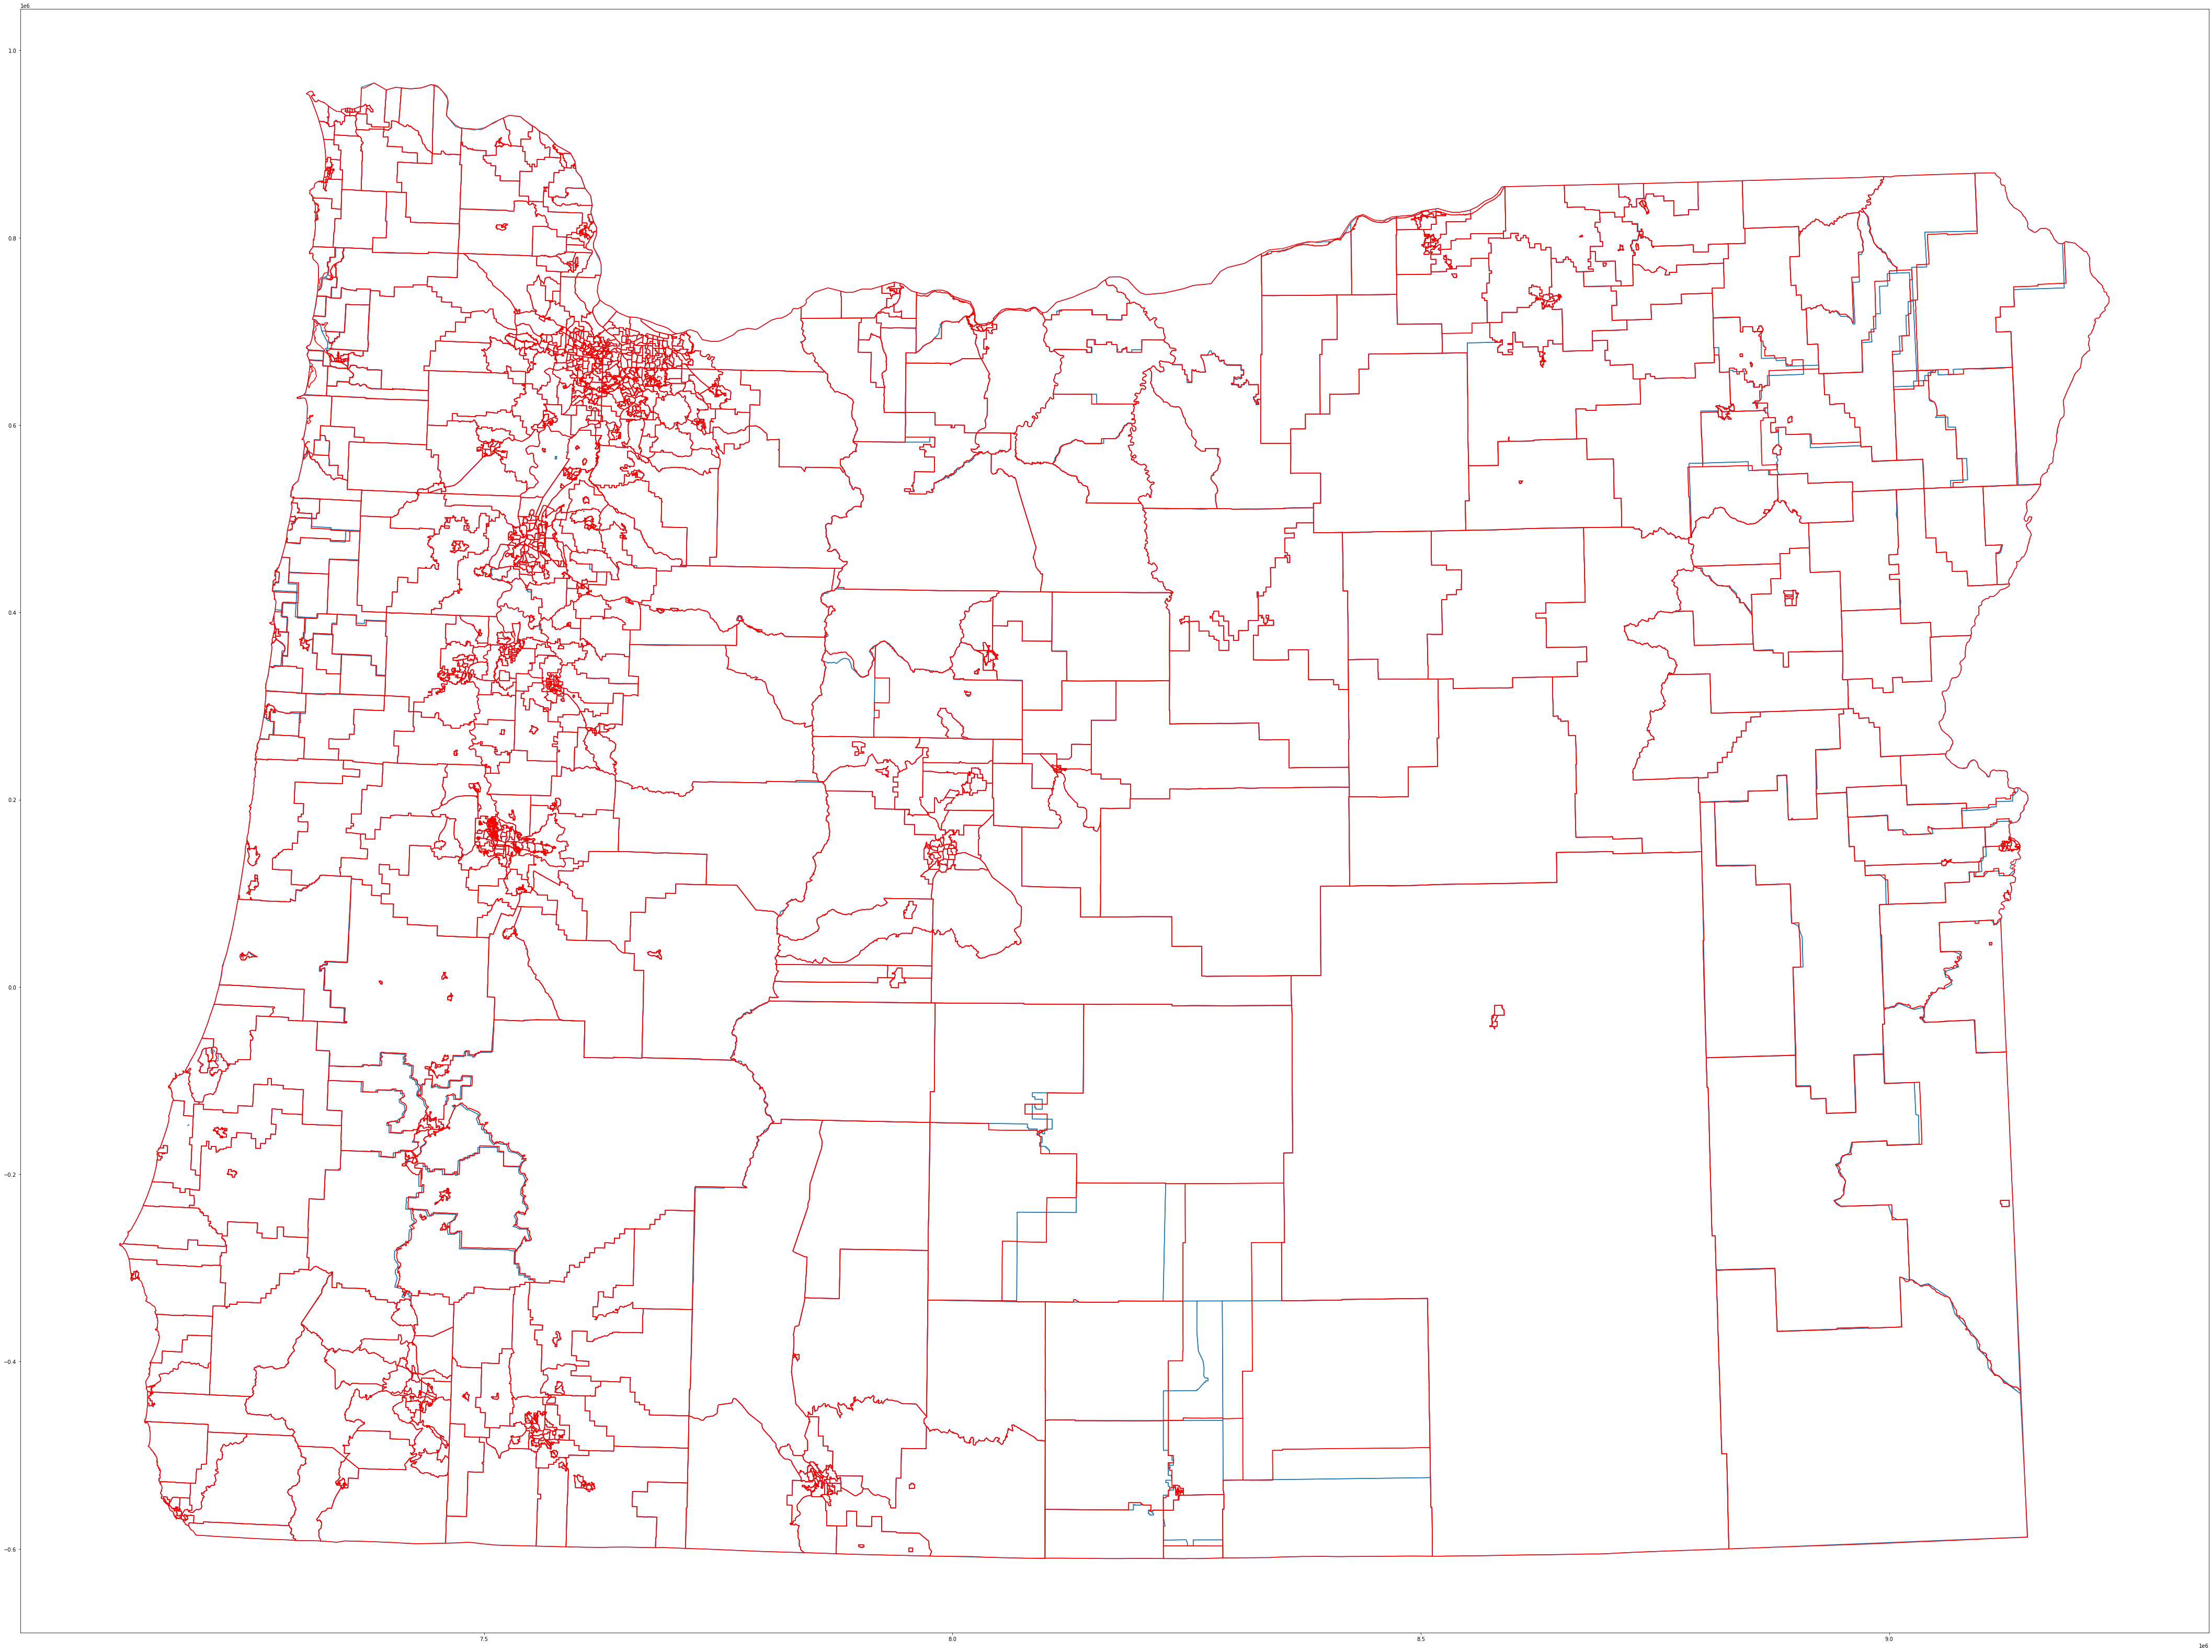

In [49]:
ax = or_check.boundary.plot(figsize=(75,75))
vest_or_16.boundary.plot(ax=ax,color="red")

<AxesSubplot:>

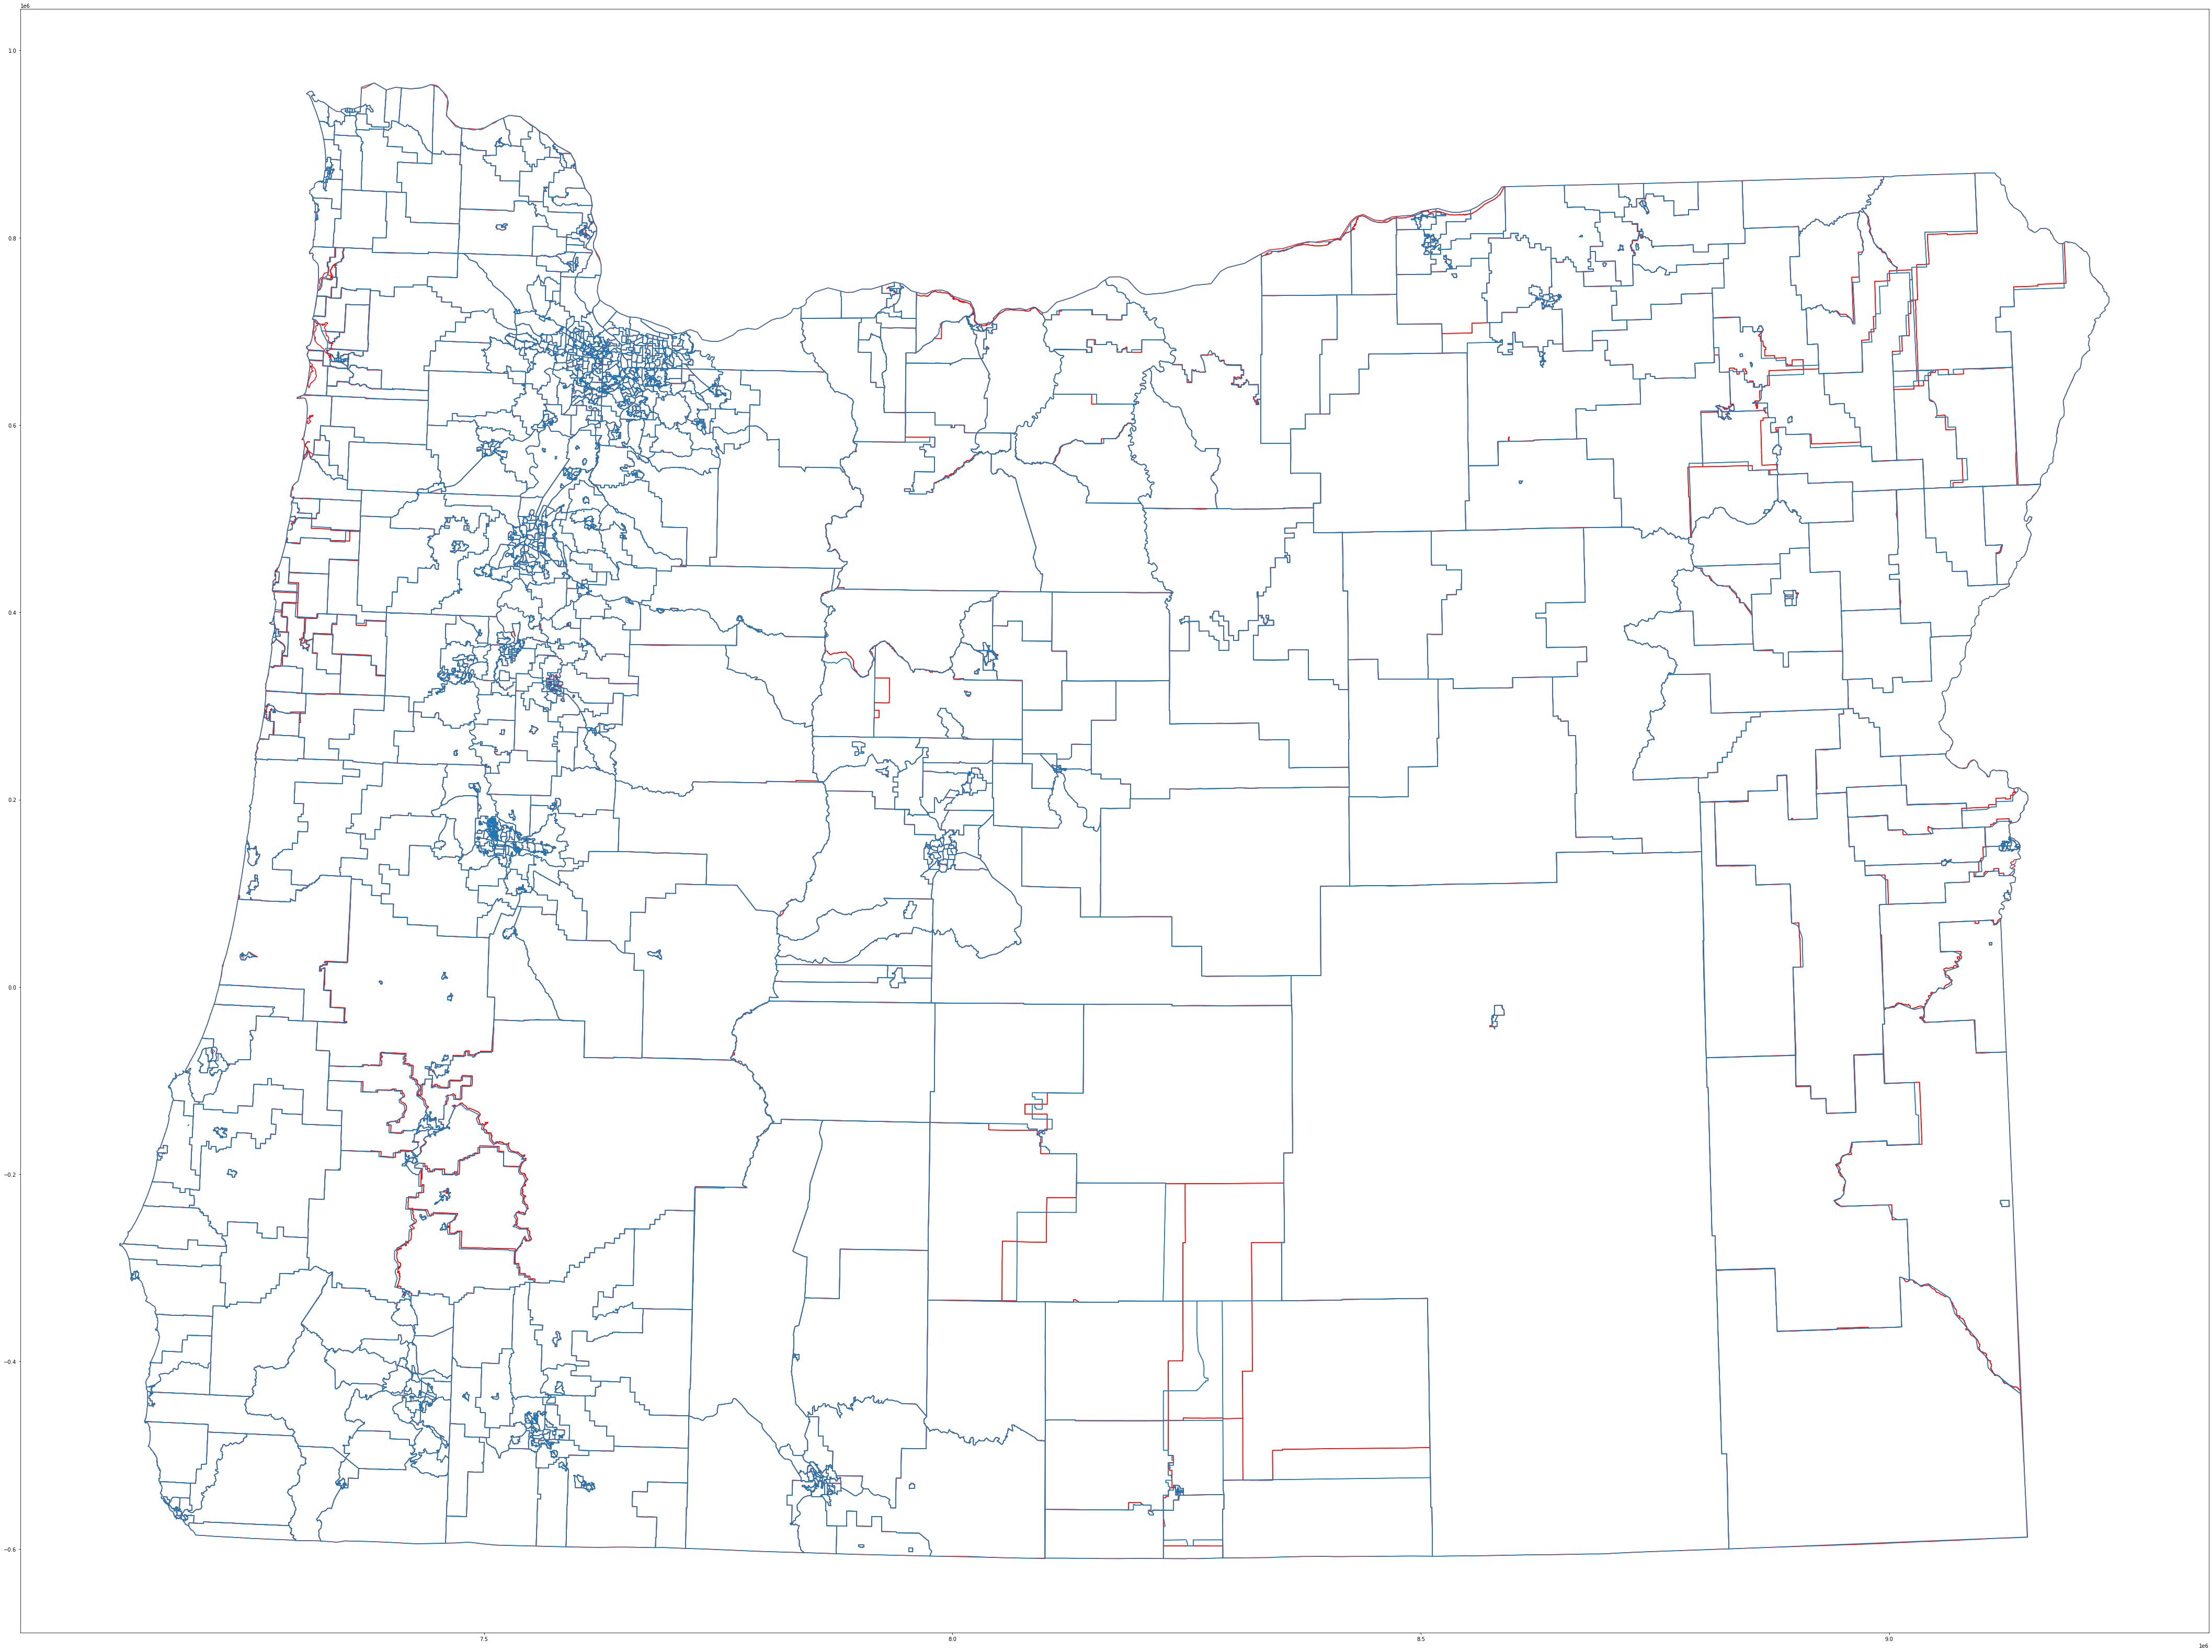

In [50]:
ax = vest_or_16.boundary.plot(color="red",figsize=(75,75))
or_check.boundary.plot(ax=ax)
